# LSE stats
By Jurriaan Parie

In this notebook insights about LSE's student population and usage of LSE's campus library are shared. The exaplanatory data analysis consists of three parts:
-  __Part 1__: statistics about graduate LSE education and graduate tuition fees in the academic year 2019/20. We acquired this data by scraping LSE web domains.
-  __Part 2__: distribution of students over the LSE departments (Part 2a) and LSE students' country of origin (Part 2b), both from the academic years 2015/16, 2016/17 and 2017/18/. We acquired this data (LSE_department_data.xlsx) via a Freedom of Information request at the LSE business analytics division.
-  __Part 3__: statistics about LSE's campus library activity by students and staff from the academic years 2015/16, 2016/17 and 2017/18/. We acquired this data (LSE_library_data.csv) via an other Freedom of Information request.

Part 1 focuses mainly on web scraping techniques. Part 2 and 3 cover data handling and visualization techniques in pandas. Every part concludes with a number of key insights.

# Part 1 - LSE graduate education stats derived by web scraping 

All available LSE graduate education programmees are listed in drop-down menus on [this webpage](http://www.lse.ac.uk/study-at-lse/Graduate/Available-programmes). All itemized programmees contain a hyperlink to their corresponding webpages. On these webpages key information is given about these programmee. We aim to substract the name of the programmee, name of the department and the tuition fees of all listed programmees in the drop-down menus.

We start with an access request to 'http://www.lse.ac.uk/study-at-lse/Graduate/Available-programmes' using the BeautifulSoup library.

In [3]:
from bs4 import BeautifulSoup
import requests 
url = 'http://www.lse.ac.uk/study-at-lse/Graduate/Available-programmes'
page = requests.get(url)
print(page.status_code)
soup = BeautifulSoup(page.content, 'html.parser')

200


200 indicates that we made a succesfull connection to the webpage. We stored the entire html file in the soup variable. Scrutinizing the webpage structure, we find that all webpages addresses are stored in < a > items that contain the label 'href'. We retrieve all those web addresses by the following code:

In [9]:
href = [a['href'] for a in soup.find_all('a', href = True)]
href[40:60]

['/wiki/Productivity',
 '/wiki/Bioethics',
 '/wiki/Human_condition',
 '/wiki/Neo-Luddism',
 '/wiki/Anarcho-primitivism',
 '/wiki/Reactionary',
 '/wiki/Transhumanism',
 '/wiki/Techno-progressivism',
 '/wiki/Human_condition',
 '#Definition_and_usage',
 '#Science,_engineering_and_technology',
 '#History',
 '#Paleolithic_(2.5_Ma_–_10_ka)',
 '#Stone_tools',
 '#Fire',
 '#Clothing_and_shelter',
 '#Neolithic_through_classical_antiquity_(10_ka_–_300_CE)',
 '#Metal_tools',
 '#Energy_and_transport',
 '#Plumbing']

We see that at a certain point the href variable contains the correct web addresses. Note that we only display the elements 40-60 since elements 0-40 are irrelevant. We see that all relevant web addresses are structured according to  /study-at-lse/Graduate/. Therefore, we select only those list elements that equal this structure.

In [3]:
grad_studies_url = [a for a in href if a[0:23] == '/study-at-lse/Graduate/']
# drop two executive studies which are still open for applications
grad_studies_url = grad_studies_url[2:]
# skip urls about  news, how to apply and contact graduate admissions
grad_studies_url = grad_studies_url[:-3]
grad_studies_url[0:20]

['/study-at-lse/Graduate/Degree-programmes-2019/MSc-Accounting-and-Finance',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Accounting-Organisations-and-Institutions',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Anthropology-and-Development',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Anthropology-and-Development-Management',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Applicable-Mathematics',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Applied-Social-Data-Science',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Behavioural-Science',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-China-in-Comparative-Perspective',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-City-Design-and-Social-Science',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Comparative-Politics',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Conflict-Studies',
 '/study-at-lse/Graduate/Degree-programmes-2019/MSc-Criminal-Justice-Policy',
 '/study-at-lse/Gradu

Excellent! We see that the list contains 206 studies.

In [4]:
len(grad_studies_url)

206

Next, we want to derive the name of the programmees from the above web addresses.

In [5]:
# 200 studies in 2019
# split href at /
grad_studies = [elm.split("/",4) for elm in grad_studies_url]
grad_studies = [elm[4] for elm in grad_studies]
grad_studies[0:20]

['MSc-Accounting-and-Finance',
 'MSc-Accounting-Organisations-and-Institutions',
 'MSc-Anthropology-and-Development',
 'MSc-Anthropology-and-Development-Management',
 'MSc-Applicable-Mathematics',
 'MSc-Applied-Social-Data-Science',
 'MSc-Behavioural-Science',
 'MSc-China-in-Comparative-Perspective',
 'MSc-City-Design-and-Social-Science',
 'MSc-Comparative-Politics',
 'MSc-Conflict-Studies',
 'MSc-Criminal-Justice-Policy',
 'MSc-Culture-and-Conflict-in-a-Global-Europe',
 'MSc-Culture-and-Society',
 'MSc-Data-Science',
 'MSc-Development-Management',
 'MSc-Development-Studies',
 'MSc-Econometrics-and-Mathematical-Economics',
 'MSc-Economic-History',
 'MSc-Economic-History-Research']

And we decouple the MSc and other prefixes.

In [6]:
grad_studies_title = [elm.split("-",1) for elm in grad_studies]
grad_studies_title[0:20]

[['MSc', 'Accounting-and-Finance'],
 ['MSc', 'Accounting-Organisations-and-Institutions'],
 ['MSc', 'Anthropology-and-Development'],
 ['MSc', 'Anthropology-and-Development-Management'],
 ['MSc', 'Applicable-Mathematics'],
 ['MSc', 'Applied-Social-Data-Science'],
 ['MSc', 'Behavioural-Science'],
 ['MSc', 'China-in-Comparative-Perspective'],
 ['MSc', 'City-Design-and-Social-Science'],
 ['MSc', 'Comparative-Politics'],
 ['MSc', 'Conflict-Studies'],
 ['MSc', 'Criminal-Justice-Policy'],
 ['MSc', 'Culture-and-Conflict-in-a-Global-Europe'],
 ['MSc', 'Culture-and-Society'],
 ['MSc', 'Data-Science'],
 ['MSc', 'Development-Management'],
 ['MSc', 'Development-Studies'],
 ['MSc', 'Econometrics-and-Mathematical-Economics'],
 ['MSc', 'Economic-History'],
 ['MSc', 'Economic-History-Research']]

Let's store this information (prefix/type + programme name + web address) in a pandas dataframe.

In [7]:
import pandas as pd
# create dataframe
df_grad_study = pd.DataFrame(grad_studies_title, columns = ['Type of study', 'Name of programme'])

# add
grad_study_url = ["http://www.lse.ac.uk" + url for url in grad_studies_url]
df_grad_study['url'] = grad_study_url

# preview dataframe
df_grad_study.head()

,Type of study,Name of programme,url
0,MSc,Accounting-and-Finance,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
1,MSc,Accounting-Organisations-and-Institutions,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
2,MSc,Anthropology-and-Development,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
3,MSc,Anthropology-and-Development-Management,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
4,MSc,Applicable-Mathematics,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...


How many different types of study did we collect?

In [8]:
df_grad_study['Type of study'].value_counts()

MSc          118
MPhilPhD      27
VRS           23
LSE           11
MResPhD       10
Executive      9
Master         2
MA             1
Global         1
Masters        1
TRIUM          1
LLM            1
Diploma        1
Name: Type of study, dtype: int64

We have 13 different types of LSE graduate education. But we take a closer look at the deviating categories such as [Diploma](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/Diploma-Accounting-and-Finance), [Global](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/Global-Masters-Management), [LLM](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/LLM), [LSE](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/LSE-Sciences-Po-Double-Degree-in-European-Studies), [MA](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/MA-Global-Studies-A-European-Perspective), [MPA](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/Master-of-Public-Administration), [MPP](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/Master-of-Public-Policy), [Masters](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/Masters-in-Management) and [TRIUM](http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/TRIUM-Global-Executive-MBA) and we append those subcategories to one of the 5 main categories (Taught master's, Executive programme, Research, Visiting research students, Double/Joint taught master's).

In [56]:
# assign to category
df_grad_study['Type of study'][df_grad_study['Type of study'].isin(['MSc', 'Global', 'LLM', 'Master', 'Masters', 'MPA', 'MPP', 'Diploma'])] = "Taught master's"
df_grad_study['Type of study'][df_grad_study['Type of study'].isin(['Executive', 'TRIUM'])] = "Executive programme"
df_grad_study['Type of study'][df_grad_study['Type of study'].isin(['LSE', 'MA'])] = "Double/Joint taught master's"
df_grad_study['Type of study'][df_grad_study['Type of study'].isin(['MPhilPhD', 'MResPhD'])] = "Research"
df_grad_study['Type of study'][df_grad_study['Type of study'].isin(['VRS'])] = "Visiting Research Students"
# df_grad_study['Type of study'][df_grad_study['Type of study'].isin(['Diploma'])] = "Graduate diploma Accounting and Finance"

# manually editing
df_grad_study['Type of study'][df_grad_study['Name of programme'].isin(['Global-Media-and-Communications-LSE-and-Fudan', 'Global-Media-and-Communications-LSE-and-UCT', 'Global-Media-and-Communications-LSE-and-USC', 'Health-Policy-Planning-and-Financing'])] = "Double/Joint taught master's"
df_grad_study['Type of study'][df_grad_study['Name of programme'].isin(['Finance-part-time', 'International-Strategy-and-Diplomacy', 'Chicago-Double-Executive-Masters-Health-Policy'])] = "Executive programme"
df_grad_study.head()

,Type of study,Name of programme,url
0,Taught master's,Accounting-and-Finance,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
1,Taught master's,Accounting-Organisations-and-Institutions,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
2,Taught master's,Anthropology-and-Development,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
3,Taught master's,Anthropology-and-Development-Management,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...
4,Taught master's,Applicable-Mathematics,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...


In order to plot the distribution of different types of study, we create labels of the 5 categories.

In [57]:
sizes = df_grad_study['Type of study'].value_counts()
labels = df_grad_study['Type of study'].value_counts().index.tolist()
labels

["Taught master's",
 'Research',
 'Visiting Research Students',
 'Executive programme',
 "Double/Joint taught master's"]

And we plot the result.

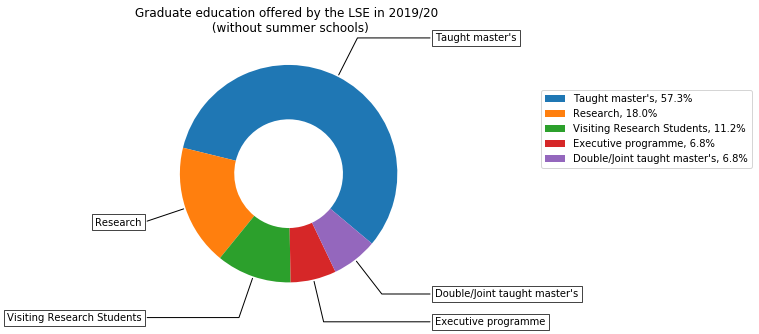

In [139]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw = dict(aspect = "equal"))

data = sizes

wedges, texts = ax.pie(data, wedgeprops = dict(width = 0.5), startangle = -40)

bbox_props = dict(boxstyle = "square,pad=0.3", fc = "w", ec = "k", lw = 0.72)
kw = dict(xycoords = 'data', textcoords = 'data', arrowprops = dict(arrowstyle = "-"),
          bbox = bbox_props, zorder = 0, va = "center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle, angleA = 0, angleB = {}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy = (x, y), xytext = (1.35*np.sign(x), 1.4*y),
                 horizontalalignment = horizontalalignment, **kw)
    
# legend
total = sum(sizes)

plt.legend(
    loc = 'best',
    labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop = {'size': 10},
    bbox_to_anchor=(1.2, 0.75),
    bbox_transform = fig.transFigure
)

ax.set_title("Graduate education offered by the LSE in 2019/20 \n (without summer schools)")

plt.show()

We see the vast majority of graduate education at the LSE exists of taught master's (57.3%), followed by PhD/Research education (18%) and visiting PhD/Research students (11.2%). 

Next, we want to access all web addresses corresponding to the programmees stored in df_grad_study dataframe to collect information about the department and tuition fees of the programme. The name of the department of every programme is listed in < li > elements in html divs affiliated to class "keyDetails__item--dept". The tuition fees are located in the first < td > wrap after the < th > "Tuition fee" < /th > element.

In [59]:
n_study = df_grad_study.shape[0]
dept_list = []
all_fees_list = []

for i in range(n_study):
    # get url from dataframe
    url = df_grad_study.iloc[i,2]
    # connect BeautifulSoup to url
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # find department according to div class
    dept = soup.find_all("li", {"class": "keyDetails__item--dept"})
    # convert html file  to string
    dept = str(dept[0])
    # remove <li> </li> wrap
    dept = dept[dept.find('>') + 1:dept.find("/li")]
    # collect text
    dept_list.append(dept[:-1])
    
    # find tuition fees
    
    # exception to main structure
    if url == 'http://www.lse.ac.uk/study-at-lse/Graduate/Degree-programmes-2019/TRIUM-Global-Executive-MBA':
        all_fees_list.append('NaN')
        continue
    try:
        fees = soup.find("th", text = "Tuition fee").find_next_sibling("td").text
        all_fees_list.append(fees)
    except: 
        fees = soup.find("b", text = "Tuition fee").find_next("td").text
        all_fees_list.append(fees)

Let's check the result.

In [218]:
dept_list[0:20]

['Department of Accounting',
 'Department of Accounting',
 'Department of Anthropology',
 'Department of Anthropology',
 'Department of Mathematics',
 'Department of Methodology',
 'Department of Psychological and Behavioural Science',
 'Department of Anthropology',
 'Department of Sociology',
 'Department of Government',
 'Department of Government',
 'Department of Social Policy',
 'European Institute',
 'Department of Sociology',
 'Department of Statistics',
 'Department of International Development',
 'Department of International Development',
 'Department of Economics',
 'Department of Economic History',
 'Department of Economic History']

This looks nice! What about the tuition fees?

In [62]:
all_fees_list[0:20]

['UK/EU: £28,056Overseas: £28,608',
 'UK/EU: £28,056Overseas £28,608',
 'UK/EU: £14,088Overseas £21,744',
 'UK/EU:\xa0£21,744Overseas:\xa0£21,744',
 'UK/EU: £14,088Overseas £21,744',
 'UK/EU:\xa0£28,056Overseas\xa0£28,608',
 'UK/EU:\xa0£21,744Overseas:\xa0£21,744',
 'UK/EU:\xa0£14,088Overseas\xa0£21,744',
 'UK/EU: £28,056Overseas: £28,608',
 'UK/EU:\xa0£21,744Overseas\xa0£21,744',
 'UK/EU:\xa0£21,744Overseas\xa0£21,744',
 'UK/EU:\xa0£14,088Overseas\xa0£21,744',
 'UK/EU:\xa0£21,744Overseas: £21,744',
 'UK/EU:\xa0£14,088Overseas: £21,744',
 'UK/EU: £28,056Overseas £28,608',
 'UK/EU:\xa0£21,744Overseas\xa0£21,744',
 'UK/EU:\xa0£14,088Overseas\xa0£21,744',
 'UK/EU: £28,056Overseas £28,608',
 'UK/EU:\xa0£14,088Overseas\xa0£21,744',
 'UK/EU:\xa0£14,088Overseas\xa0£21,744']

We need refine the tuition fees a bit more. We can split the tuition fees in two different categories: UK/EU and Overseas.

In [73]:
uk_eu_list = [0] * n_study
overseas_list = [0] * n_study

for i in range(n_study):
    elm = all_fees_list[i]
    
    # main structure
    if "O" in elm:
        fees = elm.split("O", 1)
        uk_eu = fees[0].split("£")[1]
        uk_eu_list[i] = uk_eu
        overseas = fees[1].split("£")[1]
        overseas_list[i] = overseas
        
    # deviating case 
    elif elm[0:8] == "Year one" or elm[0:10] == "First year":
        fees = elm.split("£", 1)[1][0:6]
        uk_eu_list[i] = fees
        overseas_list[i] = fees
    
    # deviating case 
    elif elm[0] == "£":
        fees = elm[1:7]
        uk_eu_list[i] = fees
        overseas_list[i] = fees
        
    # deviating case    
    elif elm[0:3] == "USD":
        fees = 'NaN'
        uk_eu_list[i] = fees
        overseas_list[i] = fees
        
    # deviating case 
    else:
        fees = 'NaN'
        uk_eu_list[i] = fees
        overseas_list[i] = fees

Let's check the result for the EU/UK tuition fees:

In [74]:
uk_eu_list[0:20]

['28,056',
 '28,056',
 '14,088',
 '21,744',
 '14,088',
 '28,056',
 '21,744',
 '14,088',
 '28,056',
 '21,744',
 '21,744',
 '14,088',
 '21,744',
 '14,088',
 '28,056',
 '21,744',
 '14,088',
 '28,056',
 '14,088',
 '14,088']

And for the Overseas tuition fees:

In [75]:
overseas_list[0:20]

['28,608',
 '28,608',
 '21,744',
 '21,744',
 '21,744',
 '28,608',
 '21,744',
 '21,744',
 '28,608',
 '21,744',
 '21,744',
 '21,744',
 '21,744',
 '21,744',
 '28,608',
 '21,744',
 '21,744',
 '28,608',
 '21,744',
 '21,744']

Next, we remove the commas for both lists. Note that not all tuition fees follow the main structure. For this reason, we created some if statements. For the UK/EU tuition fees list:

In [76]:
for i in range(n_study):
    elm = uk_eu_list[i]
    # main structure
    if len(elm) == 6 or ('(' in elm and 'provisional' not in elm):
        elm = int(elm[0:7].replace(',',''))
        uk_eu_list[i] = elm
        
    # deviating case 
    elif elm == 'NaN':
        elm = np.nan
        uk_eu_list[i] = elm
        
    # deviating case
    elif 'for the first year' in elm:
        elm = int(elm[0:5].replace(',',''))
        uk_eu_list[i] = elm
        
    # deviating case   
    elif '2020 continuing' in elm:
        elm = int(elm[0:7].replace(',',''))
        uk_eu_list[i] = elm
        
    # all others case    
    else:
        elm = int(elm[0:5].replace(',',''))*3
        uk_eu_list[i] = elm
        
uk_eu_list[0:20]

[28056,
 28056,
 14088,
 21744,
 14088,
 28056,
 21744,
 14088,
 28056,
 21744,
 21744,
 14088,
 21744,
 14088,
 28056,
 21744,
 14088,
 28056,
 14088,
 14088]

And the Overseas tuition fees list:

In [77]:
for i in range(n_study):
    elm = overseas_list[i]
    # main structure
    if len(elm) == 6 or '(' in elm:
        elm = int(elm[0:7].replace(',',''))
        overseas_list[i] = elm
        
    # deviating case
    elif elm == 'NaN':
        elm = np.nan
        overseas_list[i] = elm
    
    # deviating case
    elif 'per' in elm:
        elm = int(elm[0:6].replace(',',''))
        overseas_list[i] = elm
     
    # deviating case
    else:
        elm = int(elm[0:7].replace(',',''))
        overseas_list[i] = elm
overseas_list[0:20]

[28608,
 28608,
 21744,
 21744,
 21744,
 28608,
 21744,
 21744,
 28608,
 21744,
 21744,
 21744,
 21744,
 21744,
 28608,
 21744,
 21744,
 28608,
 21744,
 21744]

Let's store these lists in the df_grad_study dataframe.

In [78]:
df_grad_study['Department'] = dept_list
df_grad_study['Tuition fees UK/EU students'] = uk_eu_list
df_grad_study['Tuition fees overseas students'] = overseas_list

df_grad_study.head(10)

,Type of study,Name of programme,url,Department,Tuition fees UK/EU students,Tuition fees overseas students
0,Taught master's,Accounting-and-Finance,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Accounting,28056.0,28608.0
1,Taught master's,Accounting-Organisations-and-Institutions,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Accounting,28056.0,28608.0
2,Taught master's,Anthropology-and-Development,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Anthropology,14088.0,21744.0
3,Taught master's,Anthropology-and-Development-Management,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Anthropology,21744.0,21744.0
4,Taught master's,Applicable-Mathematics,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Mathematics,14088.0,21744.0
5,Taught master's,Applied-Social-Data-Science,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Methodology,28056.0,28608.0
6,Taught master's,Behavioural-Science,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Psychological and Behavioural Sc...,21744.0,21744.0
7,Taught master's,China-in-Comparative-Perspective,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Anthropology,14088.0,21744.0
8,Taught master's,City-Design-and-Social-Science,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Sociology,28056.0,28608.0
9,Taught master's,Comparative-Politics,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Government,21744.0,21744.0


And we plot the number of programmees provided by each LSE department.

In [141]:
deps = df_grad_study['Department'].value_counts()
labels2 = df_grad_study['Department'].value_counts().index.tolist()

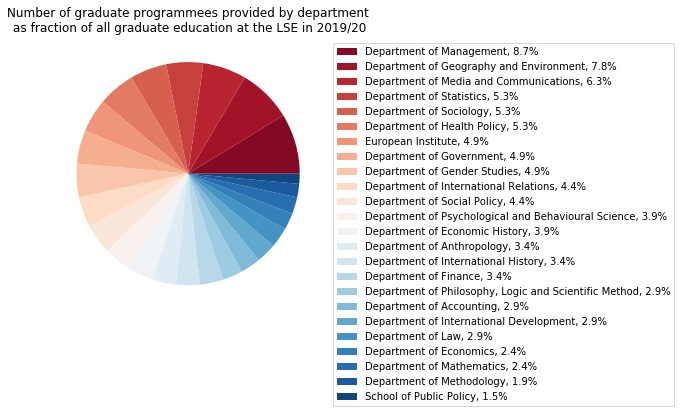

In [229]:
fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = dict(aspect = "equal"))

counts = df_grad_study['Department'].value_counts()
plt.axis('equal')
# palette = sns.color_palette("RdBu", n_colors=24)
palette = sns.color_palette("RdBu", 24)
# palette = palette[::-1]

counts.plot(kind = 'pie', colors = palette, labels = None, ax = ax)
plt.legend(labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels2, deps)],
           loc = "best", 
           bbox_to_anchor = (1, 1))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Number of graduate programmees provided by department\n as fraction of all graduate education at the LSE in 2019/20')

plt.show()

Wonderfull! We see the department of Management, Geography & Environment and Media & Communication provide the most graduate programmees.

We create a different data to gain insight about tuitions fees by type of study.

In [108]:
df_type_of_study = df_grad_study.groupby(['Type of study']).mean()
df_type_of_study

,Tuition fees UK/EU students,Tuition fees overseas students
Type of study,,
Double/Joint taught master's,21620.307692,22822.153846
Executive programme,22901.300000,22901.300000
Research,4366.000000,18624.000000
Taught master's,19838.847458,23655.322034
Visiting Research Students,11256.000000,7248.000000


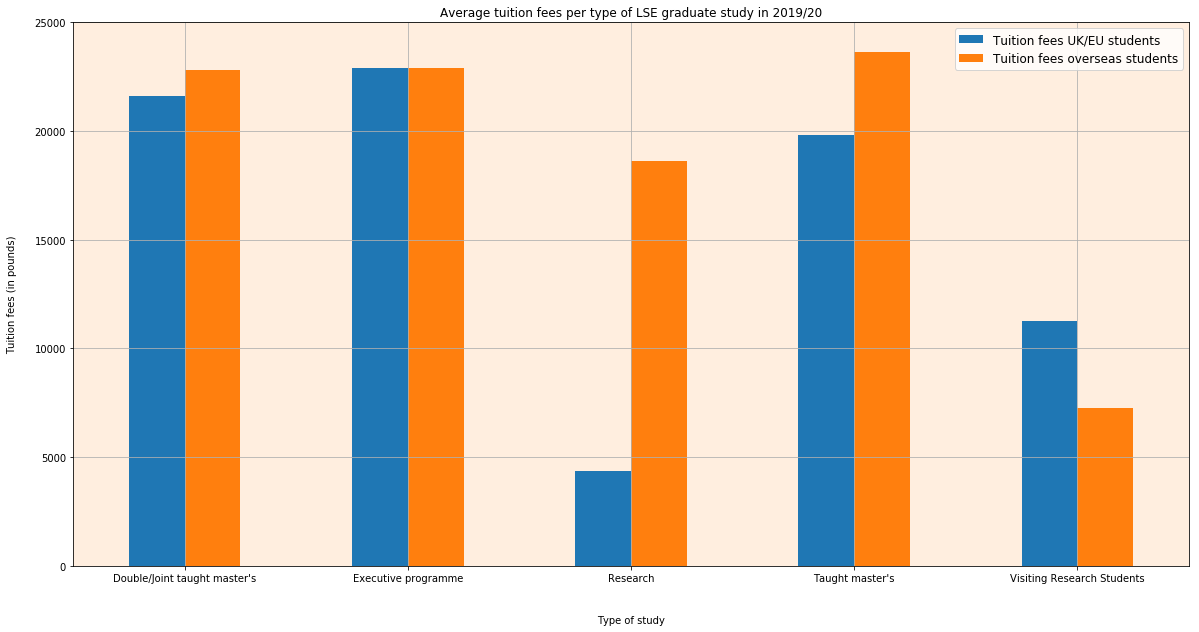

In [143]:
fig, ax = plt.subplots(figsize=(20,10))
df_type_of_study.plot(kind = "bar", ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')


# ax.get_legend().remove()
ax.xaxis.set_label_coords(0.5,-0.09)
ax.yaxis.set_label_coords(-0.05,0.5)
ax.set_title('Average tuition fees per type of LSE graduate study in 2019/20')
ax.set_ylabel('Tuition fees (in pounds)')
plt.ylim(0,25000)
plt.xticks(rotation = 0)

plt.legend(fontsize = 12)
plt.show()

We see that on average taught master's for overseas students are the most expensive type of graduate study at the LSE, visting research students pay significantly less than regular LSE graduate students and tuition fees for UK/EU research students are the least expensive.

We can plot the same figure but now grouped by department.

In [109]:
df_department = df_grad_study.groupby(['Department']).mean()
df_department.head()

,Tuition fees UK/EU students,Tuition fees overseas students
Department,,
Department of Accounting,16831.333333,21100.000000
Department of Anthropology,13388.285714,19227.428571
Department of Economic History,11303.500000,19152.000000
Department of Economics,18695.600000,20966.400000
Department of Finance,22950.571429,24572.571429


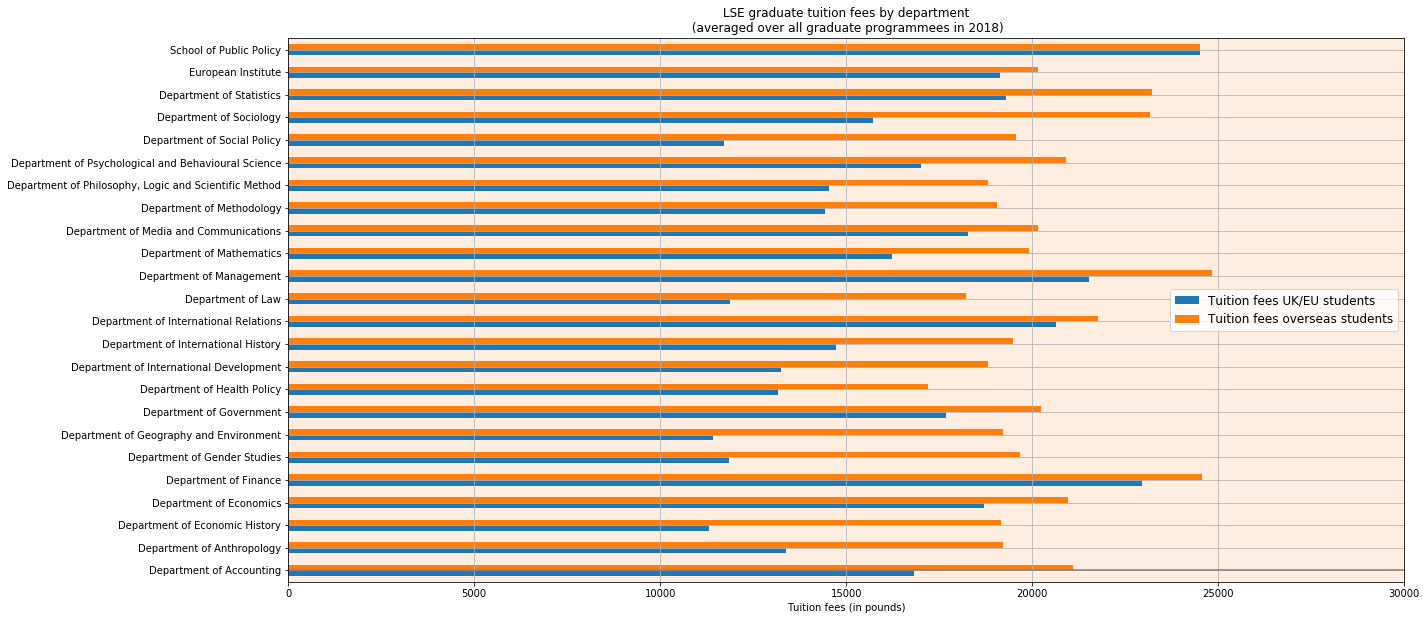

In [119]:
fig, ax = plt.subplots(figsize=(20,10))
df_department.plot(kind = "barh", ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')
ax.axhline(y = 0, color='gray')
# ax.yaxis.set_label_coords(-0.05,0.5)

# axis
ax.set_title('LSE graduate tuition fees by department\n (averaged over all graduate programmees in 2019/20)')
ax.set_xlabel('Tuition fees (in pounds)')
ax.set_ylabel('')
plt.xlim(0,30000)
plt.xticks(rotation = 0)

plt.legend(fontsize = 12)
plt.show()

The most expensive graduate studies for overseas students are provided by the Department of Management followed by the Department of Finance. For UK/EU students, the most expensive graduate studies are thought by the School of Public Policy. Note that UK/EU tuition fees almost everywhere significanlty lower than for Overseas students. 

The last plot we create from this data displays the top 40 most expensive taught master's by the LSE. We create the corresponding dataframe. 

In [135]:
# change deviating names
df_grad_study['Name of programme'][df_grad_study['Name of programme'] == 'of-Public-Policy'] = "Master-of-Public-Policy"
df_grad_study['Name of programme'][df_grad_study['Name of programme'] == 'in-Management'] = "Masters-in-Management"

# create new dataframe
df_desc_fees = df_grad_study.sort_values(by = ['Tuition fees UK/EU students'], ascending = False)
df_desc_fees = df_desc_fees.loc[df_desc_fees['Type of study'] == "Taught master's"]
df_desc_fees.index = df_desc_fees['Name of programme']
df_desc_fees.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Type of study,Name of programme,url,Department,Tuition fees UK/EU students,Tuition fees overseas students
Name of programme,,,,,,
Finance-full-time,Taught master's,Finance-full-time,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Finance,35568.0,35568.0
Finance-and-Private-Equity,Taught master's,Finance-and-Private-Equity,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Finance,35568.0,35568.0
Master-of-Public-Policy,Taught master's,Master-of-Public-Policy,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,School of Public Policy,32500.0,32500.0
Masters-in-Management,Taught master's,Masters-in-Management,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Management,31056.0,31056.0
Social-Innovation-and-Entrepreneurship,Taught master's,Social-Innovation-and-Entrepreneurship,http://www.lse.ac.uk/study-at-lse/Graduate/Deg...,Department of Management,29556.0,30108.0


We can plot the top 40 most expensive taught master's easily. However, it would be great to indicate by color to which department the displayed programmees belong. The following code assigns a color to every department in a dictionary.

In [136]:
deps = list(df_desc_fees['Department'].unique())
cols = sns.color_palette("tab20", n_colors = 16)
col_dict = dict(zip(deps, cols))

Then, we plot the top 40 rows of the df_desc_fees dataframe as a bar chart color according to the colors of the corresponding department.

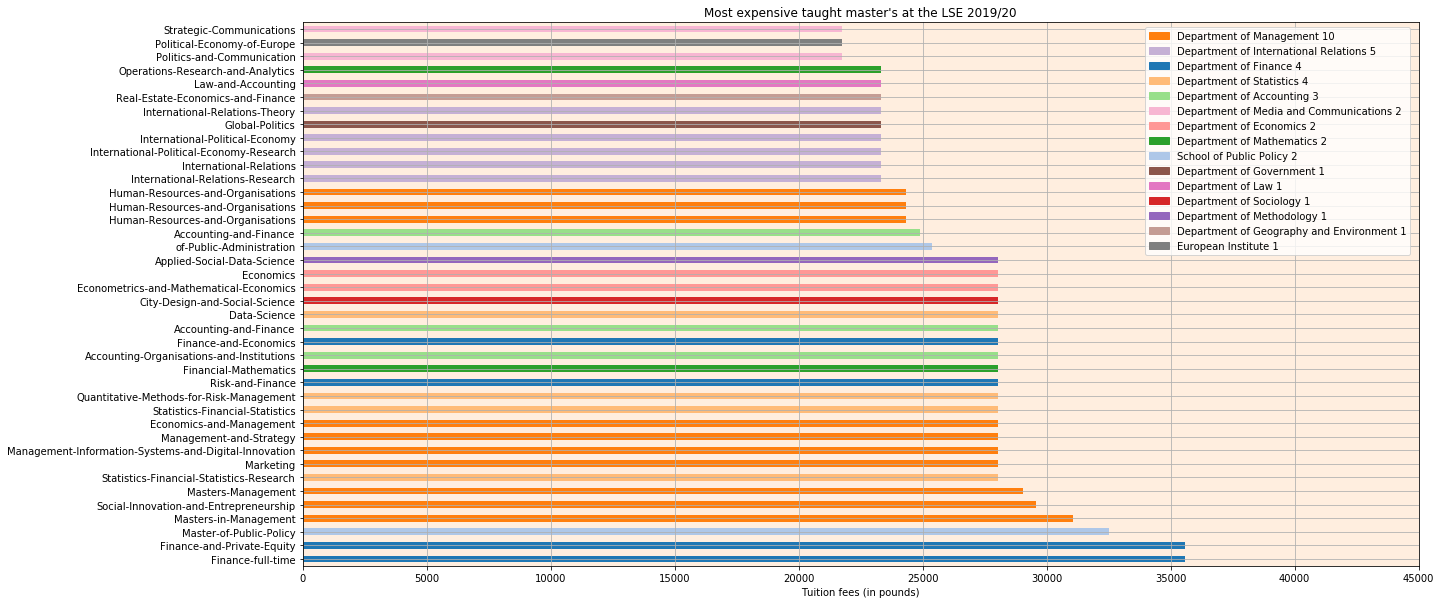

In [144]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize = (20,10))

df_desc_fees['Tuition fees UK/EU students'][0:40].plot(kind = 'barh', ax = ax, color = list(df_desc_fees['Department'][0:40].map(col_dict)))

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axis labels
ax.set_title("Most expensive taught master's at the LSE 2019/20")
ax.set_xlabel('Tuition fees (in pounds)')
ax.set_ylabel('')
plt.xlim(0,45000)
# ax.yaxis.set_label_coords(-0.05,0.5)

# legend
deps_top40 = df_desc_fees['Department'][0:40].value_counts().index.tolist()
count_deps_top40 = df_desc_fees['Department'][0:40].value_counts().tolist()
n_deps_top40 = len(deps_top40)

handle_legend = []

for i in range(n_deps_top40):
    dep = deps_top40[i]
    count_dep = count_deps_top40[i]
    legend_label = mpatches.Patch(color = col_dict[dep], label = "%s %i" % (dep, count_dep))
    handle_legend.append(legend_label)

plt.legend(handles = handle_legend, bbox_to_anchor = (0.75, 1))

# plot 
plt.show()

The most expensive taught master's at the LSE in 2019/20 will be Finance, Finance & Private Equity and Public Policy. The department providing the most top 40 most expensive taught master's is Management (10), followed by the department of International Relations (5) and the department of Finance (4).

Note that the MSc Data Science is ranked #19th of the most expensive taught master's at the LSE 2019/20.

To conclude, we give a short summary in three bullet points about the main insights achieved in __Part 1__ of this data analysis.
-  LSE's Department of Management is on average the most expensive department for graduate studies for overseas students within the LSE and the 3rd most expensive department for UK/EU students within the LSE.
-  Overseas PhD students pay 4 times more tuition fees than UK/EU PhD students at the LSE.
-  LSE's Department of Management delivers 10 of the 40 most expensive taught master's and provides the most graduate studies of the whole LSE.  

# Part 2 - LSE student administration

We acquired this data about the distribution of students over LSE department in the academic years 2015/16-2017/18 via a _Freedom of Information_ request at the LSE business intelligence division. 

We import the data from the Data Request sheet in an Excel file.

In [12]:
xl = pd.ExcelFile("LSE_department_data.xlsx")
df_dep = xl.parse("Data Request")
df_dep.head()

,SCE_AYRC,STU_NATC,COD_NAME,PROG_DEPT_NAME,CURRENT_PROG_NAME
0,2015/6,UK,England,Accounting,BSc in Accounting and Finance
1,2015/6,UK,England,Accounting,BSc in Accounting and Finance
2,2015/6,PAK,Pakistan,Accounting,BSc in Accounting and Finance
3,2015/6,HKG,Hong Kong,Accounting,BSc in Accounting and Finance
4,2015/6,UK,England,Accounting,BSc in Accounting and Finance


The data has the following dimensions.

In [13]:
df_dep.shape

(85411, 5)

We change the name of the columns.

In [14]:
df_dep.columns = ['Year', 'Nationality', 'Former country of residence', 'Name of Department', 'Name of Programme']
df_dep.head()

,Year,Nationality,Former country of residence,Name of Department,Name of Programme
0,2015/6,UK,England,Accounting,BSc in Accounting and Finance
1,2015/6,UK,England,Accounting,BSc in Accounting and Finance
2,2015/6,PAK,Pakistan,Accounting,BSc in Accounting and Finance
3,2015/6,HKG,Hong Kong,Accounting,BSc in Accounting and Finance
4,2015/6,UK,England,Accounting,BSc in Accounting and Finance


And check whether there is missing data.

In [15]:
df_dep.isnull().sum()

Year                               0
Nationality                      507
Former country of residence    31563
Name of Department                 0
Name of Programme                  0
dtype: int64

We see that students' study details are complete. Though, data about students' nationality and former country of residence contains a lot of missing values.

The data contains LSE student information from the following academic years:

In [16]:
df_dep['Year'].value_counts()

2017/8    29924
2016/7    28723
2015/6    26764
Name: Year, dtype: int64

The data contains:

In [17]:
print(len(df_dep['Nationality'].value_counts()), "different nationalities")
print(len(df_dep['Name of Department'].value_counts()), "different departments")
print(len(df_dep['Name of Programme'].value_counts()), "different programmes")

188 different nationalities
30 different departments
472 different programmes


# 2a Department data

We display how the 85411 students in the academic years 2015/16, 2016/17 and 2017/18 were distributed over the LSE departments.

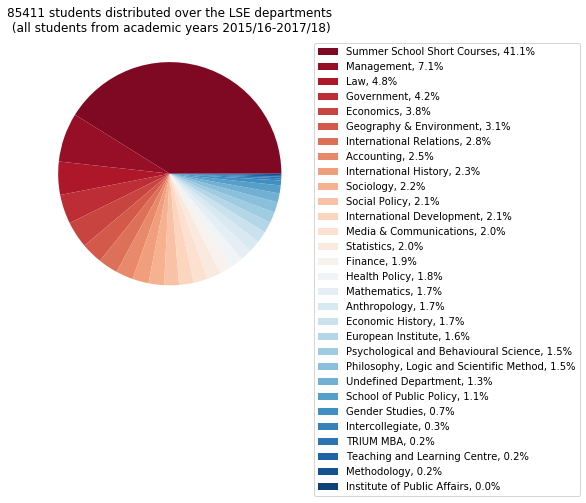

In [230]:
from colour import Color
import seaborn as sns
fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = dict(aspect = "equal"))

counts = df_dep['Name of Department'].value_counts()
labels = counts.index.tolist()
plt.axis('equal')
palette = sns.color_palette("RdBu", 30)

total = sum(counts)

counts.plot(kind = 'pie', colors = palette, labels = None, ax = ax)
plt.legend(labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, counts)],
           loc = "best", 
           bbox_to_anchor = (1, 1))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('%i students distributed over the LSE departments\n (all students from academic years 2015/16-2017/18)' %df_dep.shape[0])
plt.show()

We see a very big proportion (41.1%) of all students registred at the LSE in 2015/16-2017/18 are Summer School students. How will the students be distributed over the departments if we take out all Summer School students?

In [19]:
df_no_sum_school = df_dep.loc[df_dep['Name of Department'] != 'Summer School Short Courses']
df_sum_school = df_dep.loc[df_dep['Name of Department'] == 'Summer School Short Courses']
df_no_sum_school.head()

,Year,Nationality,Former country of residence,Name of Department,Name of Programme
0,2015/6,UK,England,Accounting,BSc in Accounting and Finance
1,2015/6,UK,England,Accounting,BSc in Accounting and Finance
2,2015/6,PAK,Pakistan,Accounting,BSc in Accounting and Finance
3,2015/6,HKG,Hong Kong,Accounting,BSc in Accounting and Finance
4,2015/6,UK,England,Accounting,BSc in Accounting and Finance


The number of students following a regular programme at the LSE (no summer school) is significantly smaller.

In [20]:
df_no_sum_school.shape[0]

50282

Let's plot the chart again.

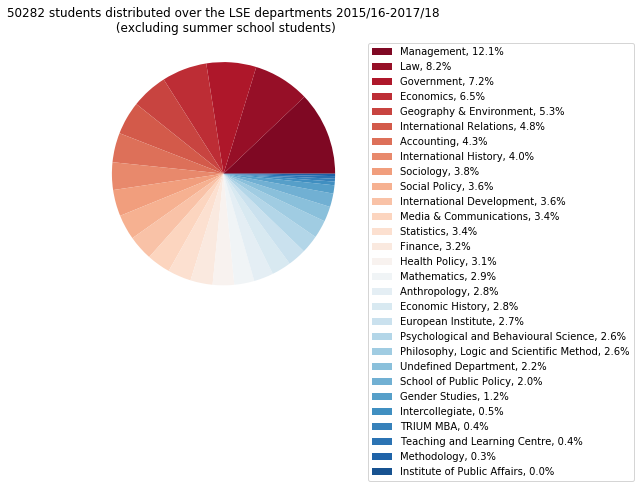

In [231]:
fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = dict(aspect = "equal"))

counts = df_no_sum_school['Name of Department'].value_counts()
labels = counts.index.tolist()
plt.axis('equal')
palette = sns.color_palette("RdBu", 30)

total = sum(counts)

counts.plot(kind = 'pie', colors = palette, labels = None, ax = ax)
plt.legend(labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, counts)],
           loc = "best", 
           bbox_to_anchor = (1, 1))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('%i students distributed over the LSE departments 2015/16-2017/18\n (excluding summer school students)' %df_no_sum_school.shape[0])
plt.show()

The departments of Management, Law and Government are the largest departments within the LSE. The tail of the list contains multiple undefined departments, but includes the department of Methodology, Gender Studies and the School of Public Policy.  

The absolute number of students per department is:

In [22]:
df_no_sum_school['Name of Department'].value_counts()

Management                                 6083
Law                                        4104
Government                                 3627
Economics                                  3283
Geography & Environment                    2649
International Relations                    2425
Accounting                                 2143
International History                      2004
Sociology                                  1918
Social Policy                              1831
International Development                  1815
Media & Communications                     1721
Statistics                                 1706
Finance                                    1614
Health Policy                              1566
Mathematics                                1458
Anthropology                               1425
Economic History                           1416
European Institute                         1355
Psychological and Behavioural Science      1318
Philosophy, Logic and Scientific Method 

Next, we filter on BSc and MSc students.

In [23]:
df_bsc = df_dep[df_dep['Name of Programme'].str.contains("BSc")]
df_bsc.shape

(12089, 5)

We retrieve 12089 enrolled BSc students during the academic years 2015/16-2017/18. Let's plot the distribution over the LSE departments.

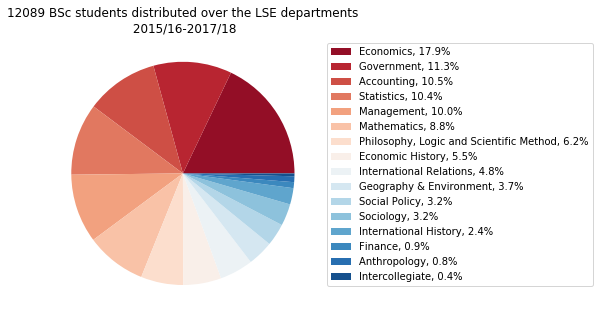

In [232]:
fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = dict(aspect = "equal"))

counts = df_bsc['Name of Department'].value_counts()
labels = counts.index.tolist()
plt.axis('equal')
palette = sns.color_palette("RdBu", 16)

total = sum(counts)

counts.plot(kind = 'pie', colors = palette, labels = None, ax = ax)
plt.legend(labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, counts)],
           loc = "best", 
           bbox_to_anchor = (1, 1))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('%i BSc students distributed over the LSE departments\n 2015/16-2017/18' %df_bsc.shape[0])
plt.show()

We see there are only 16 departments for BSc students instead of the former 30 departments for all students. 2/11 BSc students are educated by the department of Economics. Subsequent, the departments of Government and Accounting follow up as large departments. The smallest departments are Anthropology, Finance and International History.

We do the same for MSc students.

In [25]:
df_msc = df_dep[df_dep['Name of Programme'].str.contains("MSc|Master")]
df_msc.shape

(29248, 5)

We retrieve 29248 MSc students in the academic years 2015/16-2017/18 and we plot the distribution by department.

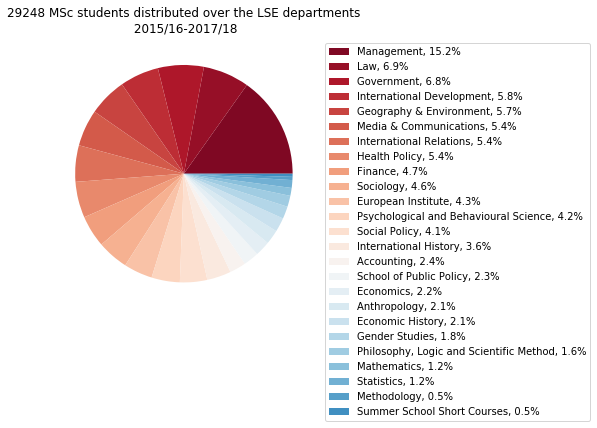

In [233]:
fig, ax = plt.subplots(figsize = (5, 5), subplot_kw = dict(aspect = "equal"))

counts = df_msc['Name of Department'].value_counts()
labels = counts.index.tolist()
# plt.axis('equal')
palette = sns.color_palette("RdBu", 30)

total = sum(counts)

counts.plot(kind = 'pie', colors = palette, labels = None, ax = ax)
plt.legend(labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, counts)],
           loc = "best", 
           bbox_to_anchor = (1, 1))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('%i MSc students distributed over the LSE departments\n 2015/16-2017/18' %df_msc.shape[0])
plt.show()

Management is by far the largest department for MSc students. Followed up by the departments of Law and Government. Notice that the department of Mathematics, Stastics and Philosophy, Logic & Scientific Methods has shifted from top positions for BSc students to bottom positions for MSc students.

We can compare the above figure about 'the number of students distributed over the LSE departments' with the pie chart from __Part 1__ displaying 'the number of taught master programmees by LSE department'.

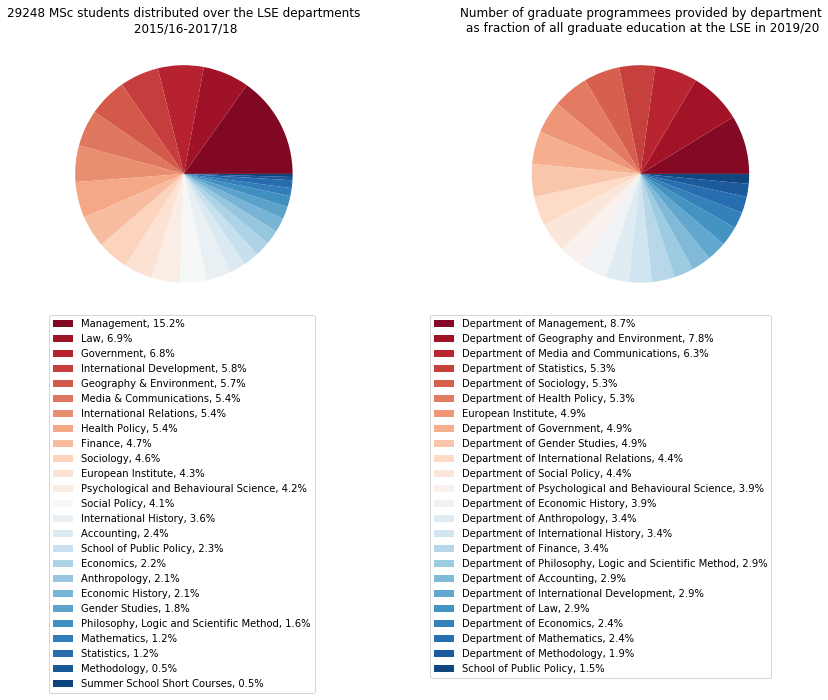

In [162]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# pie chart 1 
counts = df_msc['Name of Department'].value_counts()
labels = counts.index.tolist()
palette = sns.color_palette("RdBu", 25)
total = sum(counts)

counts.plot(kind = 'pie', colors = palette, labels = None, ax = ax[0], subplots = True, figsize = (1, 1))
ax[0].legend(labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, counts)],
           loc = "best", 
           bbox_to_anchor = (1, 0))

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('%i MSc students distributed over the LSE departments\n 2015/16-2017/18' %df_msc.shape[0])

# pie chart 2
counts =  df_grad_study['Department'].value_counts()
labels = counts.index.tolist()
palette = sns.color_palette("RdBu", 24)
total = sum(counts)

counts.plot(kind = 'pie', colors = palette, labels = None, ax = ax[1], subplots = True, figsize = (1, 1))
ax[1].legend(labels = ['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, counts)],
           loc = "best", 
           bbox_to_anchor = (1, 0))

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Number of graduate programmees provided by department\n as fraction of all graduate education at the LSE in 2019/20')

plt.show()

The above figure displays some interesting insights: some department offer both the most graduate programmees at the LSE and educate the most graduate students at the LSE, like the Department of Management, Media & Communications and Geography & Environment. Other department are ranked in the middle of both lists, like the Department of Psychological & Behavioural Science, Accounting and Anthropology. Though, some department are listed high in the leftish list and low in the rightish list, i.e. the department provides a small amount of graduate studies but educates a lot of student, like the Departments of Law, International Development and Finance. The reverse holds for departments that are listed low in the leftish list but high in the rightish list, like the Departments of Statistics, Mathematics and Gender Studies.

We continue with LSE students' distribution of origin.

# 2b LSE students' nationality data

The df_dep dataframe contains a column with students' _Nationality_. Let's plot the top 40 most represented countries. Note that 507 values are missing.

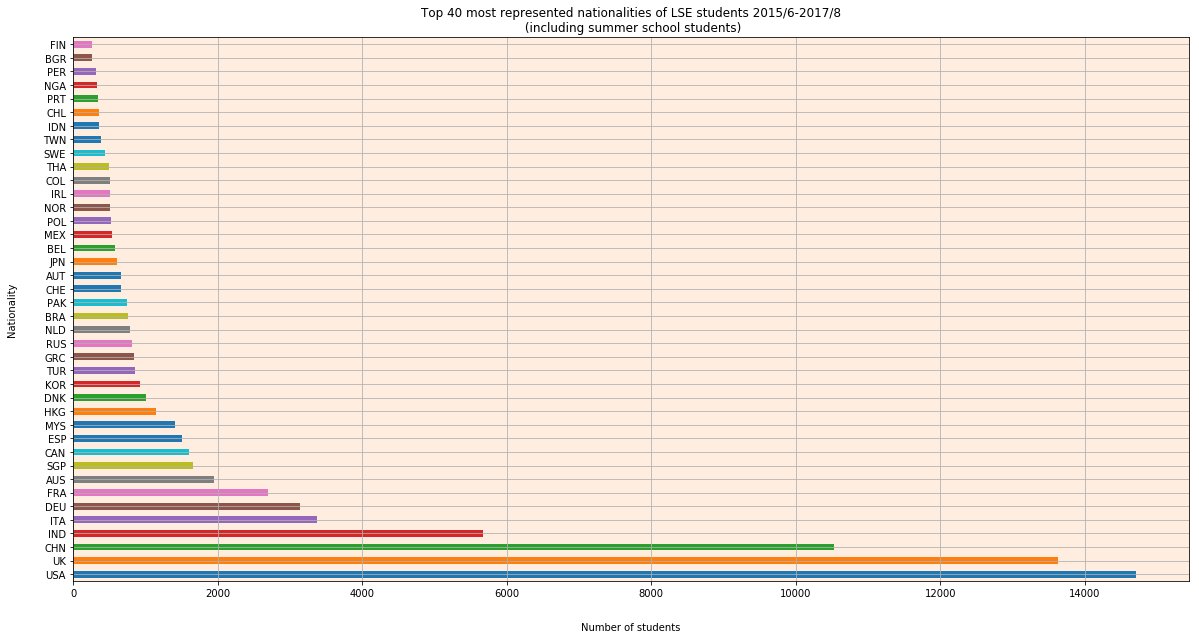

In [165]:
fig, ax = plt.subplots(figsize = (20,10))
df_dep['Nationality'].value_counts()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axis, labels, title
ax.set_title("Top 40 most represented nationalities of LSE students 2015/6-2017/8\n (including summer school students)")
ax.set_xlabel('Number of students')
ax.set_ylabel('Nationality')
ax.xaxis.set_label_coords(0.5, -0.075)
ax.yaxis.set_label_coords(-0.05,0.5)

plt.xticks(rotation = 0)

# plot
plt.show()

To improve the readability of the above y-labels, we want to map the nationality codes to the corresponding nationality names. We assume that for the top 40 nationality, the most frequent former country of residence matches the nationality of students. Let's test this for the case of the USA. First, we create a dataframe containing all USA students.

In [29]:
df_usa = df_dep.loc[df_dep['Nationality'] == 'USA']
df_usa.head()

,Year,Nationality,Former country of residence,Name of Department,Name of Programme
8,2015/6,USA,Singapore,Accounting,BSc in Accounting and Finance
436,2015/6,USA,Switzerland,Accounting,BSc in Accounting and Finance
447,2015/6,USA,USA,Accounting,Diploma in Accounting and Finance
532,2015/6,USA,USA,Accounting,MSc in Accounting and Finance
545,2015/6,USA,USA,Accounting,MSc in Accounting and Finance


In [30]:
df_usa.shape

(14707, 5)

It turns out that 14.707 students have a nationality from the USA. By far the most frequent former country of origin prior to LSE study is the US.

In [31]:
df_usa['Former country of residence'].value_counts()

USA                                             3604
England                                          126
India                                             20
United Arab Emirates                              19
Hong Kong                                         17
Switzerland                                       13
Germany                                           13
France                                            12
China                                             12
South Korea                                       11
Lebanon                                            8
Singapore                                          8
Nigeria                                            8
Ecuador                                            7
Taiwan                                             7
Palestine (West Bank, East Jerusalem & Gaza)       6
Israel                                             6
Turkey                                             6
Spain                                         

Hence, for the top 40 nationalities we can use this procedure to match the nationality country code to the country name.

We repeat this procedure to match the country code with the country name for all countries. Note that if all values in the _Nationality_ column are _NaN_ values, we manually assign 'NaN' as the nationality value.

In [32]:
nat_code = df_dep['Nationality'].value_counts().index.tolist()
nat_name_list = []
for country in nat_code:
    df_temp = df_dep.loc[df_dep['Nationality'] == country]
    if sum(df_temp['Former country of residence'].isnull()) == df_temp.shape[0]:
        nat_name = 'NaN'
    else:
        nat_name = df_temp['Former country of residence'].value_counts().index[0]

    nat_name_list.append(nat_name)

For the first 40 countries this approach is succesful (see below). Note that tail countries in the _value-counts()_ list will probably not be matched correctly to country names.

In [166]:
# dictionary
df_nat = {'Nationality code': nat_code, 'Country name': nat_name_list}

# pandas dataframe
df_nat = pd.DataFrame(df_nat)
df_nat.head(40)

,Nationality code,Country name
0,USA,USA
1,UK,England
2,CHN,China
3,IND,India
4,ITA,Italy
5,DEU,Germany
6,FRA,France
7,AUS,Australia
8,SGP,Singapore
9,CAN,Canada


Now, we want to display the figure about the top 40 most represented nationalities again but now labeled with the corresponding country names. Therefore, we first convert the above dataframe to a dictionary.

In [222]:
nat_dict = df_nat.set_index('Nationality code').to_dict()
nat_dict

{'Country name': {'????': 'Italy',
  'AFGH': 'Afghanistan',
  'ALB': 'Albania',
  'AND': 'NaN',
  'ANG': 'Angola',
  'ANTG': 'England',
  'ARG': 'Argentina',
  'ARM': 'Armenia',
  'AUS': 'Australia',
  'AUT': 'Austria',
  'AZER': 'Azerbaijan',
  'BANG': 'Bangladesh',
  'BARB': 'NaN',
  'BEL': 'Belgium',
  'BELR': 'Belarus',
  'BELZ': 'Belize',
  'BENN': 'NaN',
  'BGR': 'Bulgaria',
  'BHM': 'Bahamas',
  'BHR': 'Bahrain',
  'BHUT': 'England',
  'BIOT': 'NaN',
  'BMU': 'Bermuda',
  'BOLV': 'Bolivia',
  'BOSN': 'Bosnia and Herzegovina',
  'BRA': 'Brazil',
  'BRND': 'Burundi',
  'BRUN': 'Brunei',
  'BTSW': 'Botswana',
  'BURF': 'Burkina Faso',
  'BURM': 'Burma (Myanmar)',
  'CAMB': 'Cambodia',
  'CAMR': 'England',
  'CAN': 'Canada',
  'CDI': 'Ivory Coast',
  'CHE': 'Switzerland',
  'CHL': 'Chile',
  'CHN': 'China',
  'COL': 'Colombia',
  'CONGD': 'South Korea',
  'CRI': 'Costa Rica',
  'CROA': 'Croatia',
  'CUBA': 'Cuba',
  'CYM': 'Cayman Islands',
  'CYPEU': 'Cyprus (European Union)',
  'C

Consecutively, we replace all nationality codes in the original dataframe by the keys (nationalities) of the above dictionary.

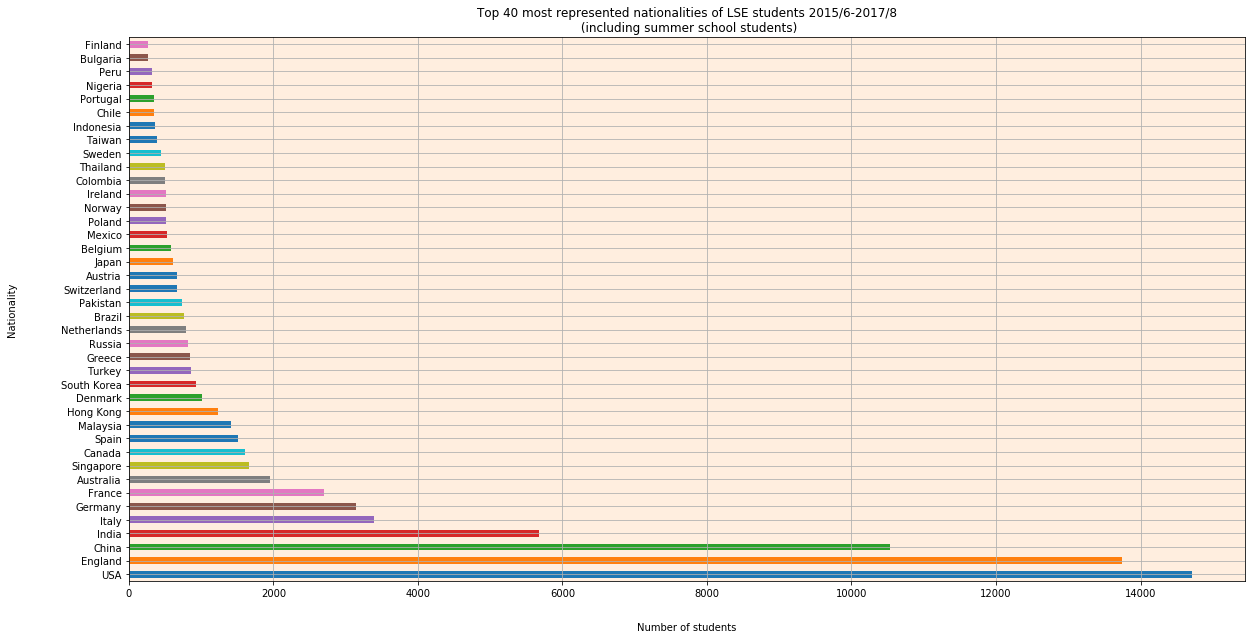

In [210]:
fig, ax = plt.subplots(figsize = (20,10))
df_dep2 = df_dep.copy()
df_dep2['Nationality'] = df_dep2['Nationality'].map(nat_dict['Country name'])
df_dep2['Nationality'].value_counts()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')


# axis, title, labels
ax.set_title("Top 40 most represented nationalities of LSE students 2015/6-2017/8\n (including summer school students)")
ax.set_xlabel('Number of students')
ax.set_ylabel('Nationality')
ax.xaxis.set_label_coords(0.5, -0.075)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.xticks(rotation = 0)

# plot
plt.show()

We succesfully mapped the y-labels from country codes to coutry names!

Let's plot the most frequent nationalities enrolled in the summer school short courses.

In [169]:
df_sum_school.shape

(35129, 5)

We repeat the procedure of mapping the country codes to country names by using the created dictionary.

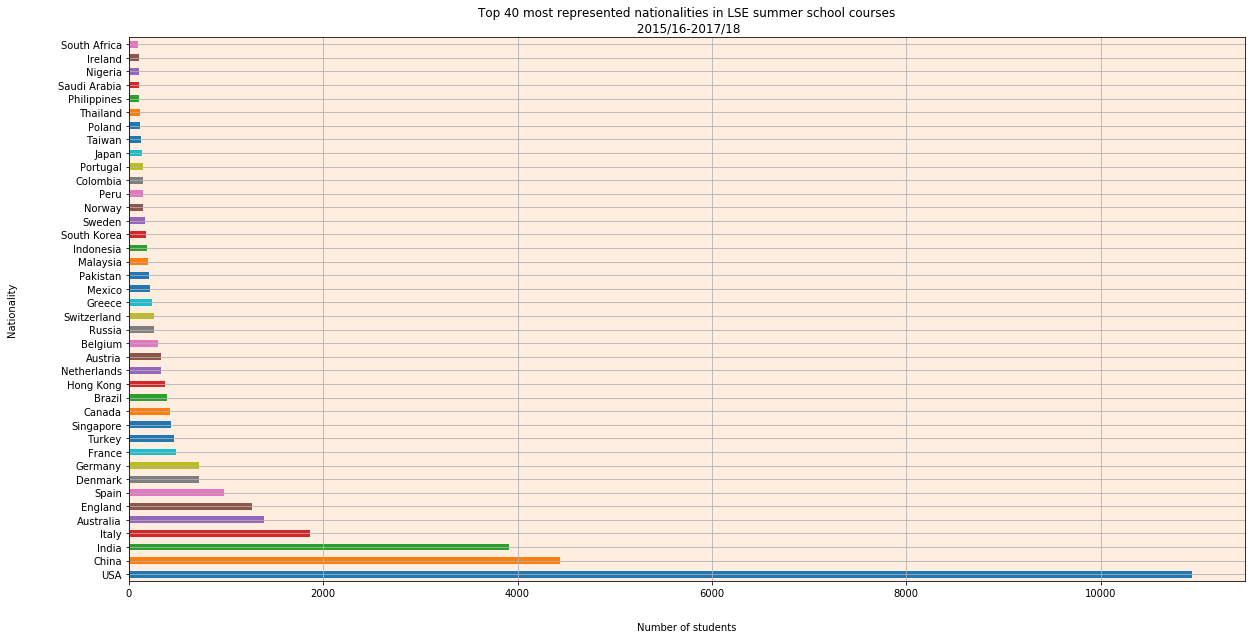

In [211]:
fig, ax = plt.subplots(figsize = (20,10))
df_sum_school2 = df_sum_school.copy()
df_sum_school2['Nationality'] = df_sum_school2['Nationality'].map(nat_dict['Country name'])
df_sum_school2['Nationality'].value_counts()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axis
ax.set_title("Top 40 most represented nationalities in LSE summer school courses\n 2015/16-2017/18")
ax.set_xlabel('Number of students')
ax.set_ylabel('Nationality')
ax.xaxis.set_label_coords(0.5, -0.075)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.xticks(rotation = 0)

# plot
plt.show()

The top 3 respresented nationalities is dominated by America, Chineese and Indian students. English, German and French students are less represented in summer schools. Italian, Australian and Danish students moved upwards in the rankings.

Let's plot top 40 respresented nationality codes excluding summer school students. Again we map the nationality codes to corresponding nationalities in the dictionary.

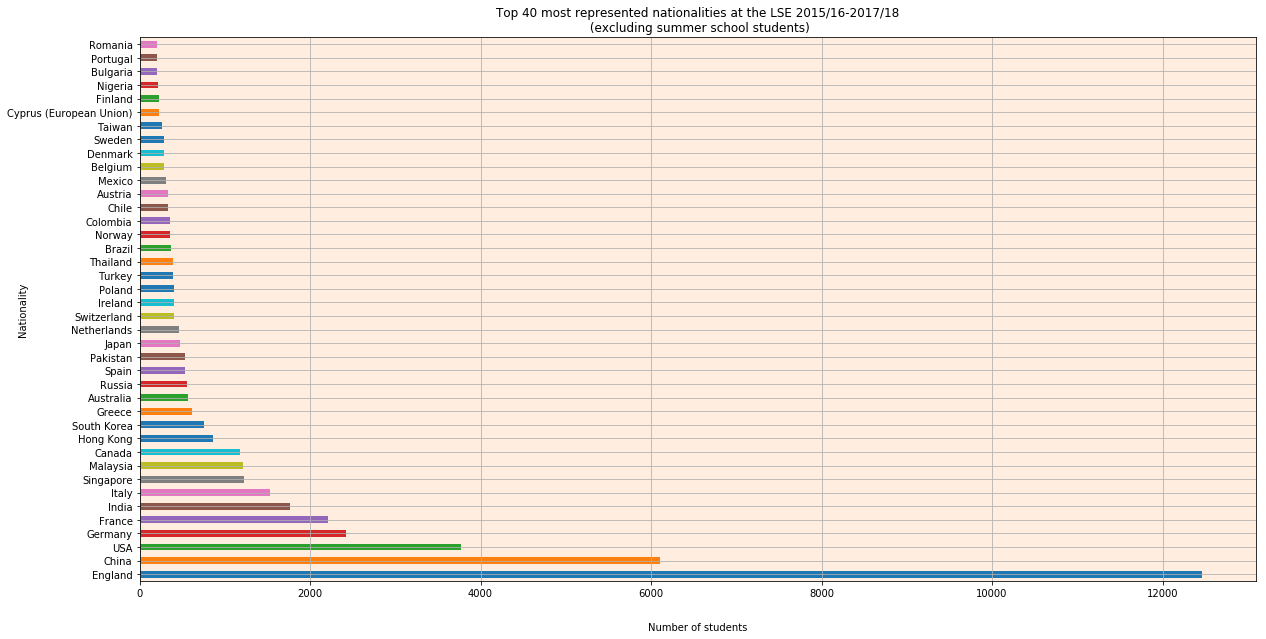

In [212]:
fig, ax = plt.subplots(figsize = (20,10))
df_no_sum_school2 = df_no_sum_school.copy()
df_no_sum_school2['Nationality'] = df_no_sum_school2['Nationality'].map(nat_dict['Country name'])
df_no_sum_school2['Nationality'].value_counts()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axis
ax.set_title("Top 40 most represented nationalities at the LSE 2015/16-2017/18\n (excluding summer school students)")
ax.set_xlabel('Number of students')
ax.set_ylabel('Nationality')
ax.xaxis.set_label_coords(0.5, -0.075)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.xticks(rotation = 0)

# plot
plt.show()

We see a plunge of especially American and Chinees students. Students from countries such as Malaysia and Pakistan climb in the rankings.

We quantify the difference between US students in regular LSE education and LSE summer school education.

In [179]:
df_usa_sum_school = df_usa.loc[df_usa['Name of Department'] == 'Summer School Short Courses']
df_usa_no_sum_school = df_usa.loc[df_usa['Name of Department'] != 'Summer School Short Courses']
print(df_usa_sum_school.shape[0], "US summer shcool students at LSE 2015/16-2017/18")
print(df_usa_no_sum_school.shape[0], "US regular students at LSE 2015/16-2017/18")

10936 US summer shcool students at LSE 2015/16-2017/18
3771 US regular students at LSE 2015/16-2017/18


We conclude that almost 75% of all US students at the LSE are enrolled in summer schools. 

What about BSc and MSc students?

In [180]:
print(df_bsc.shape[0], "BSc student at LSE 2015/16-2017/18.")

12089 BSc student at LSE 2015/16-2017/18.


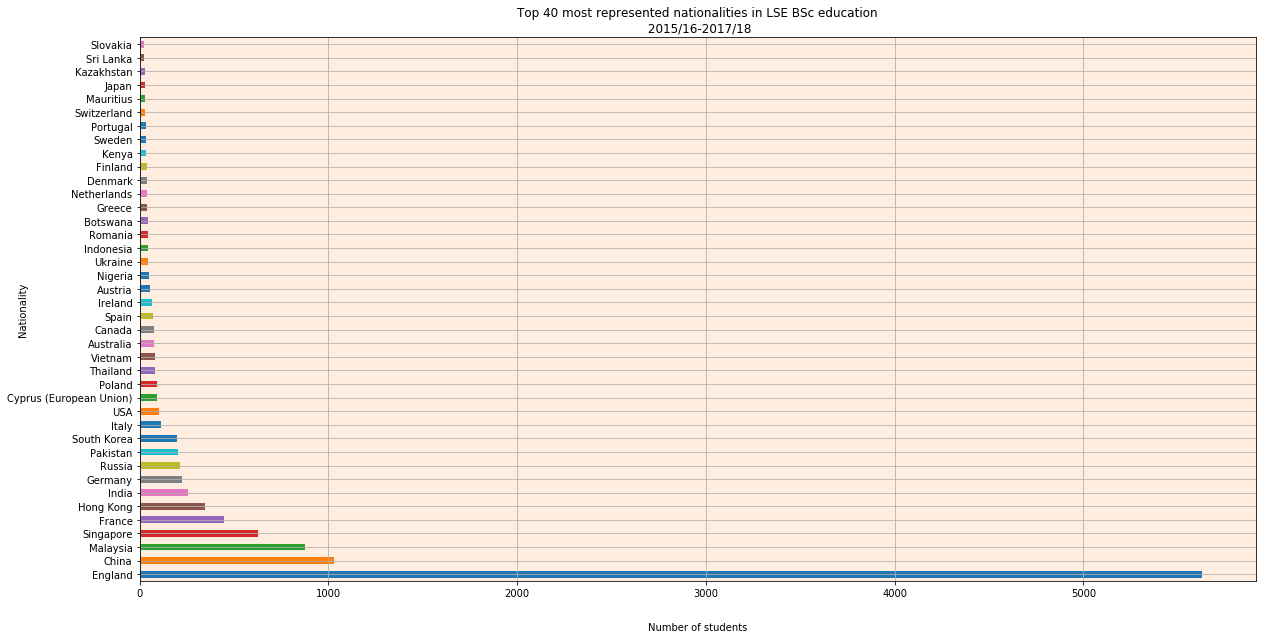

In [213]:
fig, ax = plt.subplots(figsize = (20,10))
df_bsc2 = df_bsc.copy()
df_bsc2['Nationality'] = df_bsc2['Nationality'].map(nat_dict['Country name'])
df_bsc2['Nationality'].value_counts()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axis
ax.set_title("Top 40 most represented nationalities in LSE BSc education\n 2015/16-2017/18")
ax.set_xlabel('Number of students')
ax.set_ylabel('Nationality')
ax.xaxis.set_label_coords(0.5, -0.075)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.xticks(rotation = 0)

# plot
plt.show()

We see the vast majority of all BSc students at the LSE are English. Note that English, Wales, Scotland and Nothern-Ireland are all registred as different countries.

In [42]:
df_england = df_bsc2.loc[df_bsc2['Nationality'] == 'England']
perc = df_england.shape[0]/df_bsc.shape[0] * 100
print("%.2f%% of all BSc students at the LSE are English." %perc  )

46.58% of all BSc students at the LSE are English.


We continue with MSc students.

In [43]:
print(df_msc.shape[0], "MSc student at LSE 2015/6-2017/8.")

29248 MSc student at LSE 2015/6-2017/8.


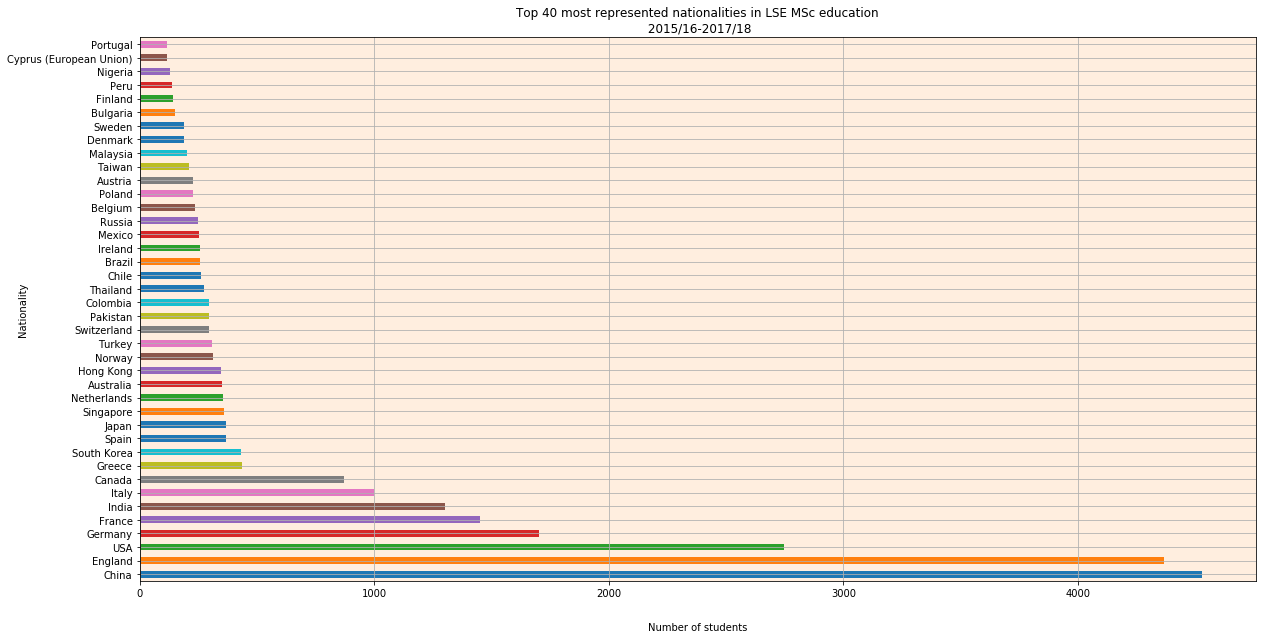

In [214]:
fig, ax = plt.subplots(figsize = (20,10))
df_msc2 = df_msc.copy()
df_msc2['Nationality'] = df_msc2['Nationality'].map(nat_dict['Country name'])
df_msc2['Nationality'].value_counts()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axis
ax.set_title("Top 40 most represented nationalities in LSE MSc education\n 2015/16-2017/18")
ax.set_xlabel('Number of students')
ax.set_ylabel('Nationality')
ax.xaxis.set_label_coords(0.5, -0.075)
ax.yaxis.set_label_coords(-0.1,0.5)
plt.xticks(rotation = 0)

# plot
plt.show()

It is close, but the Chinees are the most frequent students in LSE MSc programmees.

We can display all of the above plots in a geopandas map too! The world dataframe contains some basic information about the continent countries belong to, the size of the population and its GDP. 

In [45]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


Note that there are 188 different nationalities registred in the LSE student administration.

In [46]:
world.shape

(177, 6)

The world datframe contains 'only 177 coutries. Before we can create a heatmap in the below map, we first have to scrutinize the LSE data to assign non-existing countries to existing countries in the world dataframe.

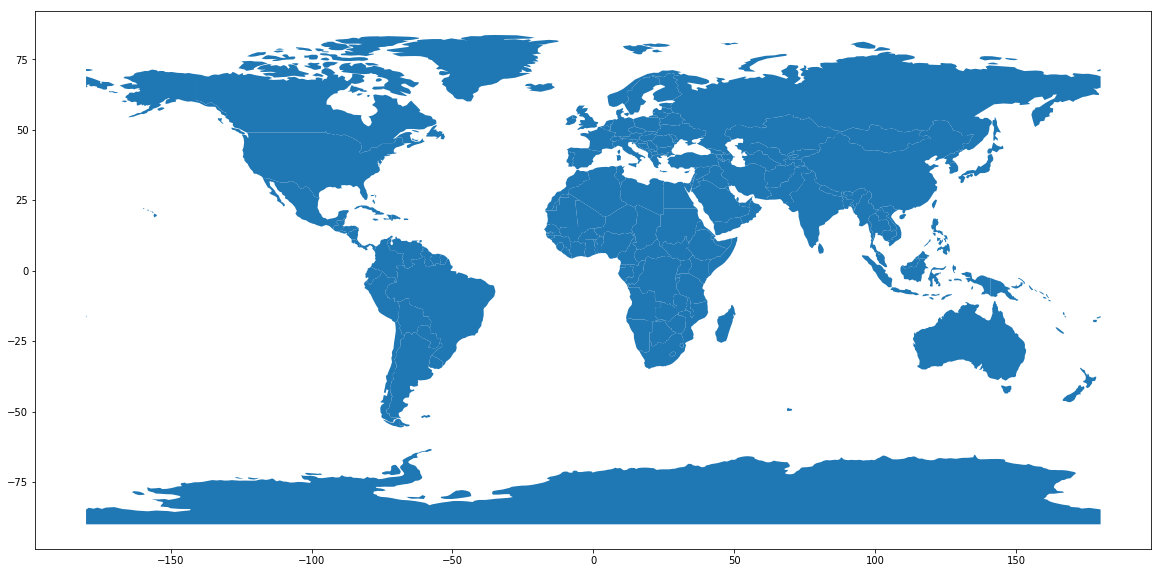

In [47]:
fig, ax = plt.subplots(1, figsize=(20, 10))
world.plot(figsize = (20,10), ax = ax)
plt.show()

First, we scrutinze whether the nationality code dictionary we defined above maps all country codes to country names correctly. We start with NaN values assigned to country codes.

In [187]:
[k for k,v in nat_dict['Country name'].items() if v == 'NaN']

['AND', 'VERD', 'NIGR', 'BARB', 'STAP', 'SEYC', 'MOZ', 'BIOT', 'BENN']

We change those key values manually in the dictionary.

In [49]:
nat_dict["Country name"]['VERD'] = 'Cape Verde'
nat_dict["Country name"]['AND'] = 'Andorra'
nat_dict["Country name"]['BENN'] = 'Benin'
nat_dict["Country name"]['STAP'] = 'Palestine'
# State of Palestine
nat_dict["Country name"]['NIGR'] = 'Niger'
nat_dict["Country name"]['MOZ'] = 'Mozambique'
nat_dict["Country name"]['BIOT'] = 'British Indian Ocean Territory'
nat_dict["Country name"]['BARB'] = 'Barbados'
nat_dict["Country name"]['SEYC'] = 'Seychelles'

Then, we controll the dictionary and change incorrect key values.

In [50]:
# drop strange values 
nat_dict["Country name"].pop('????')
nat_dict["Country name"].pop('NONE')

# edit incorrect values
nat_dict["Country name"]['BHUT'] = 'Bhutan'
nat_dict["Country name"]['CONGD'] = 'Dem. Rep. Congo'
nat_dict["Country name"]['ERIT'] = 'Eritrea'
nat_dict["Country name"]['EST'] = 'Estonia'
nat_dict["Country name"]['GAB'] = 'Gabon'
nat_dict["Country name"]['GREN'] = 'Greenland'
nat_dict["Country name"]['GUIB'] = 'Guinea-Bissau'
nat_dict["Country name"]['IRAQ'] = 'Iraq'
nat_dict["Country name"]['JER'] = 'Jersey'
nat_dict["Country name"]['LAT'] = 'Latvia'
nat_dict["Country name"]['LIBY'] = 'Libya'
nat_dict["Country name"]['MAUT'] = 'Mauritania'
nat_dict["Country name"]['SOML'] = 'Somalia'
nat_dict["Country name"]['STKN'] = 'Saint Kitts and Nevis'
nat_dict["Country name"]['TOGO'] = 'Togo'
nat_dict["Country name"]['UKNO'] = 'England'
nat_dict["Country name"]['UKOS'] = 'England'

Next, we create a new dataframe with the country names mapped according to the new dictionary.

In [51]:
df_dep3 = df_dep.copy()
df_dep3['Nationality'] = df_dep3['Nationality'].map(nat_dict['Country name'])
df_dep3.head()

,Year,Nationality,Former country of residence,Name of Department,Name of Programme
0,2015/6,England,England,Accounting,BSc in Accounting and Finance
1,2015/6,England,England,Accounting,BSc in Accounting and Finance
2,2015/6,Pakistan,Pakistan,Accounting,BSc in Accounting and Finance
3,2015/6,Hong Kong,Hong Kong,Accounting,BSc in Accounting and Finance
4,2015/6,England,England,Accounting,BSc in Accounting and Finance


We want to find which country names are listed in the df_dep dataframe but not in the world dataframe.

In [188]:
false_name_list = []
nat = df_dep3['Nationality']

for name in nat:
    toggle = len(world['name'][world['name'] == name])
    
    if toggle == 0:
        false_name_list.append(name)
    else:
        continue

The above country names do not exist in the world dataframe. Therefore, we change those country names manually to an existing country name in the world dataframe.

In [189]:
set(false_name_list)

{'Andorra',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Bosnia and Herzegovina',
 'British Indian Ocean Territory',
 'Burma (Myanmar)',
 'Cape Verde',
 'Cayman Islands',
 'Cyprus (European Union)',
 'Czech Republic',
 'Dominica',
 'England',
 'Former Yugoslav Rep of Macedonia',
 'Gibraltar',
 'Guernsey',
 'Hong Kong',
 'Isle of Man',
 'Ivory Coast',
 'Jersey',
 'Liechtenstein',
 'Macau',
 'Maldive Islands',
 'Malta',
 'Mauritius',
 'Monaco',
 'Palestine (West Bank, East Jerusalem & Gaza)',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Singapore',
 'South Korea',
 'South Sudan',
 'St Lucia',
 'St.Vincent and the Grenadines',
 'Trinidad & Tobago',
 'USA',
 nan}

In [190]:
# change non-existing country names manually
df_dep3['Nationality'][df_dep3['Nationality'].isin(['Barbados', 'Bermuda', 'British Indian Ocean Territory', 
                                                    'Cape Verde', 'Cayman Islands', 'Dominica', 'England', 
                                                    'Gibraltar', 'Grenada', 'Guernsey', 'Wales',
                                                    'Isle of Man', 'Jersey', 'Maldive Islands',
                                                    'Mauritius', 'Northern Ireland', 'Saint Kitts and Nevis',
                                                    'Scotland', 'Seychelles', 'St Lucia',
                                                    'St.Vincent and the Grenadines','Falkland Islands (Malvinas)',
                                                    'Virgin Isles UK'])] = "United Kingdom"
df_dep3['Nationality'][df_dep3['Nationality'].isin(['Hong Kong', 'Macau'])] = "China"
df_dep3['Nationality'][df_dep3['Nationality'].isin(['Fren. Polynesia', 'Monaco'])] = "France"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Bosnia and Herzegovina'] = "Bosnia and Herz."
df_dep3['Nationality'][df_dep3['Nationality'] == 'Burma (Myanmar)'] = "Myanmar"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Cyprus (European Union)'] = "Cyprus"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Czech Republic'] = "Czech Rep."
df_dep3['Nationality'][df_dep3['Nationality'] == 'Former Yugoslav Rep of Macedonia'] = "Macedonia"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Fren. Polynesia'] = "France"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Ivory Coast'] = "Côte d'Ivoire"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Palestine (West Bank, East Jerusalem & Gaza)'] = "Palestine"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Singapore'] = "Malaysia"
df_dep3['Nationality'][df_dep3['Nationality'] == 'South Korea'] = "Korea"
df_dep3['Nationality'][df_dep3['Nationality'] == 'South Sudan'] = "S. Sudan"
df_dep3['Nationality'][df_dep3['Nationality'] == 'Trinidad & Tobago'] = "Trinidad and Tobago"
df_dep3['Nationality'][df_dep3['Nationality'] == 'USA'] = "United States"

In [191]:
false_name_list = []
nat = df_dep3['Nationality']

for name in nat:
    toggle = len(world['name'][world['name'] == name])
    
    if toggle == 0:
        false_name_list.append(name)
    else:
        continue

In [192]:
set(false_name_list)

{'Andorra', 'Bahrain', 'Liechtenstein', 'Malta', nan}

We drop the remaining countries since they do not exist in the world dataframe and can not be assigned to an existing country in the world dataframe.

In [193]:
# drop Andorra, Bahrain, Liechtenstein, Malta, Not Known, nan
for row in nat.index:
    nat = df_dep3.loc[row]['Nationality']
    if nat not in world['name'].tolist():
        df_dep3 = df_dep3.drop(labels = row, axis = 0)
    else:
        continue

Next, we create two extra columns to the world dataframe to assign the number of LSE students to. We create one column for the absolute number of students and one column for the  number of LSE students proportional to country population.

In [194]:
world['LSE students'] = 0
world['LSE students norm.'] = 0
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,LSE students,LSE students norm.
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0,0
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0,0
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0,0
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0,0
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0,0


Then, we add the total amount of LSE students with a specific nationality to the corresponding country in the world datframe. At the same time, we store the normalized amount of LSE students by country population in the _LSE students norm._ column.

In [195]:
for country in df_dep3['Nationality'].unique():
    LSE_students = df_dep3['Nationality'].value_counts()[country]
    country_pop = world.loc[world['name'] == country, 'pop_est']
    world.loc[world['name'] == country, 'LSE students'] = LSE_students
    world.loc[world['name'] == country, 'LSE students norm.'] = LSE_students/country_pop

The result is visible in the world dataframe:

In [196]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,LSE students,LSE students norm.
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",35,0.000001
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,18,0.000001
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",69,0.000019
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",82,0.000017
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,161,0.000004


Now, we are able to create a heatmap of the most represented nationalities at the LSE.

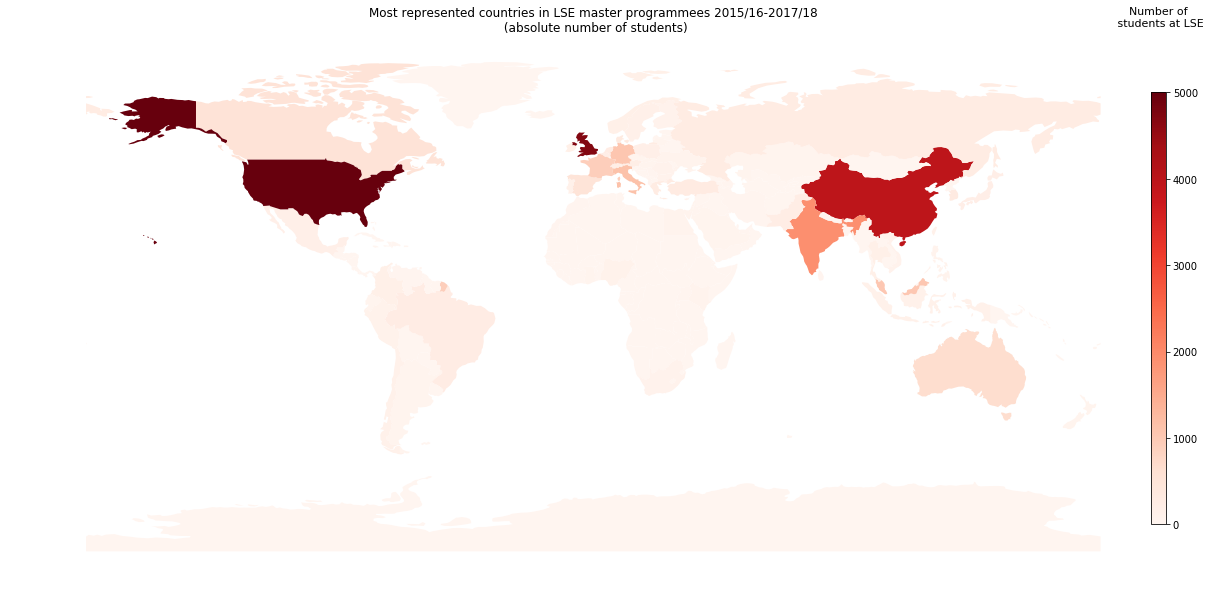

In [202]:
from geopandas import GeoDataFrame

fig, ax = plt.subplots(1, figsize=(20, 10))
world.plot(figsize = (20,10), column = 'LSE students', cmap = 'Reds', ax = ax)

cmap = 'Reds'

# title
ax.set_title("Most represented countries in LSE master programmees 2015/16-2017/18\n (absolute number of students)")
ax.axis('off')

# Add single colorbar
vmin, vmax = 0, 5000
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6])
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, cax = cax)
cbar.ax.set_title('Number of\n students at LSE', y = 1.14, fontsize = 11)

# plot
plt.show()

We see exaclty the same information as in the above bar chart. We plot the same for the number of students proportional to population size.

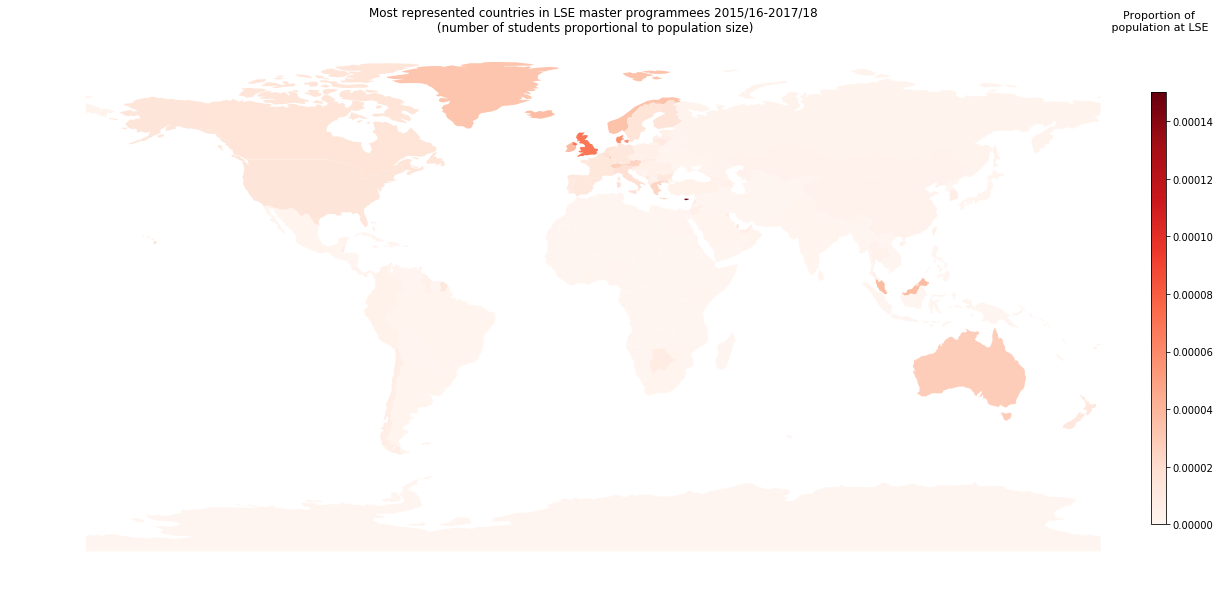

In [204]:
fig, ax = plt.subplots(1, figsize=(20, 10))
world.plot(figsize = (20,10), column = 'LSE students norm.', cmap = 'Reds', ax = ax)

cmap = 'Reds'

# title
ax.set_title("Most represented countries in LSE master programmees 2015/16-2017/18\n (number of students proportional to population size)")
ax.axis('off')

# Add single colorbar
vmin, vmax = 0, 0.00015
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6])
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, cax = cax)
cbar.ax.set_title('Proportion of\n population at LSE', y = 1.13, fontsize = 11)

# plot
plt.show()

This chart will be better understandable in a chart diagram. We adjust the dataframe.

In [205]:
world2 = world.copy()
world2.set_index('name', inplace = True)
world2.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,LSE students,LSE students norm.
name,,,,,,,
Afghanistan,28400000.0,Asia,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",35,0.000001
Angola,12799293.0,Africa,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,18,0.000001
Albania,3639453.0,Europe,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",69,0.000019
United Arab Emirates,4798491.0,Asia,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",82,0.000017
Argentina,40913584.0,South America,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,161,0.000004


And plot the result.

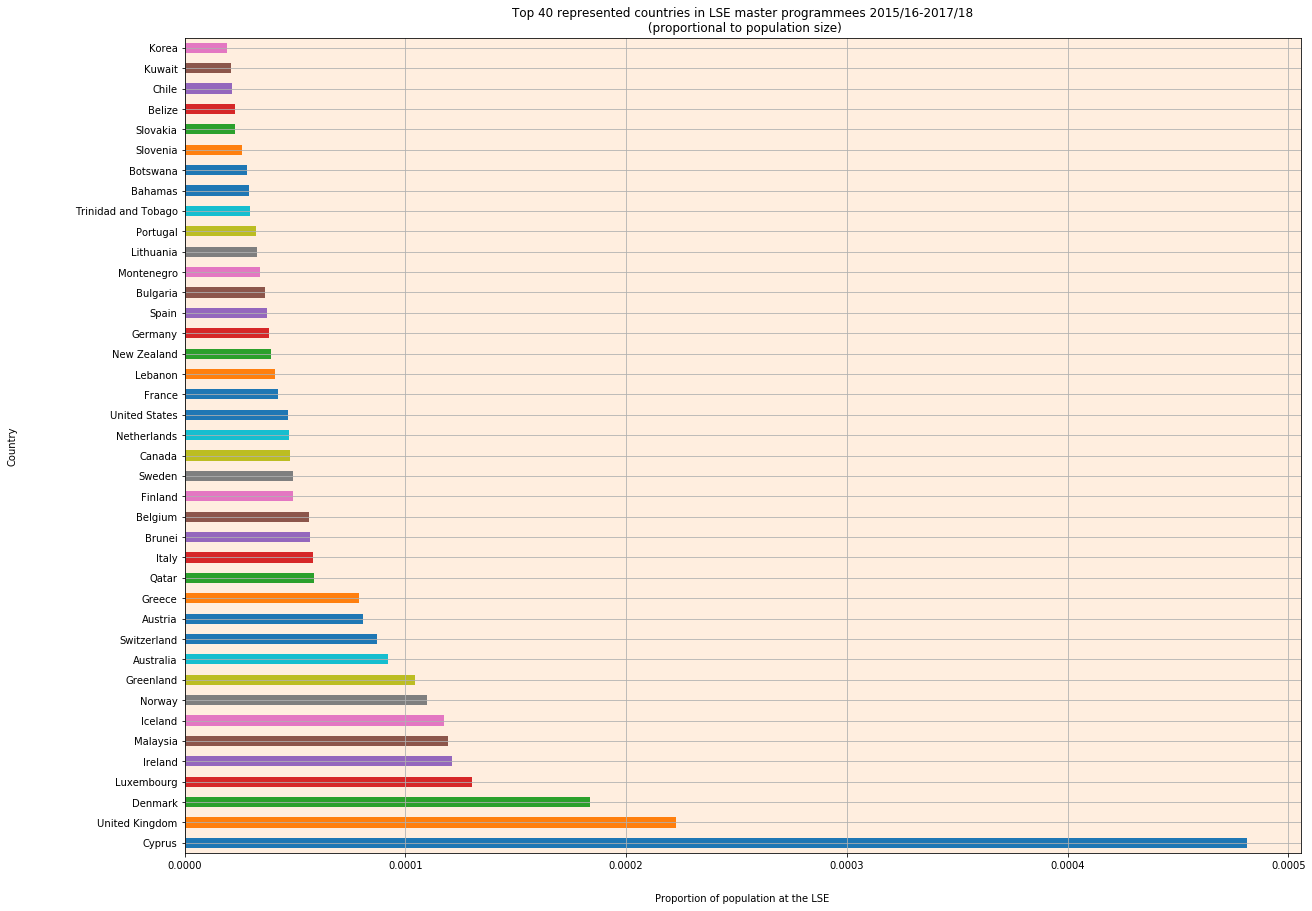

In [207]:
fig, ax = plt.subplots(figsize = (20,15))

world2['LSE students norm.'].sort_values(ascending = False).reindex()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axis
ax.set_xlabel('Proportion of population at the LSE')
ax.set_ylabel('Country')
ax.set_title("Top 40 represented countries in LSE master programmees 2015/16-2017/18\n (proportional to population size)")
ax.xaxis.set_label_coords(0.5, -0.05)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xticks(rotation = 0)

# plot
plt.show()

We conclude that Cyprus is the most represented country at the LSE proportional to country population, followed by the UK, Denmark and Luxembourg. Note that the most represented countries are mainly rich countries.

To conclude, we give a short summary in three bullet points about the main insights achieved in __Part 2__ of this data analysis:
-  41.4% of all students at the LSE in 2015/16-2017/18 were summer school students
-  25% of all US students at the LSE in 2015/16-2017/18 were enrolled in regular education, 75% of all US students were summer school students
-  Cyprus is proportional to country size the best represented country at the LSE.

# Part 3 - LSE library activity

We acquired data bout LSE library's access control requests in the academic years 2015/16-2017/18 via a _Freedom of Information_ request at the LSE business intelligence division. 

We import the data from the LSE_library_data csv file.

In [272]:
data = pd.read_csv('LSE_library_data.csv', index_col = 0)
data.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(1048575, 4)

The data contains over 1 million rows of access request in the LSE library. We preview the data:

In [273]:
data.tail()

,EventTime,Location,Event,IdNumber
50514974,2016-11-03 15:51:13,LRB COURSE COLLECTION PASS GATE IN,Valid Access (Learn MR),201509891
50514975,2016-11-03 15:51:15,LRB COURSE COLLECT TURNSTILE 1 IN,Valid Access (Learn MR),201516227
50514976,2016-11-03 15:51:16,LRB COURSE COLLECT TURNSTILE 1 IN,Valid Access (Learn MR),201516227
50514977,2016-11-03 15:51:16,LRB COURSE COLLECTION PASS GATE IN,Valid Access (Learn MR),201643546
50514983,2016-11-03 15:51:27,LRB LIFE TURNSTILE 2 OUT,Valid Access (Learn MR),201517839


We start with setting a date time indexation and drop the row dump indexation.  

In [408]:
data['EventTime'] = pd.to_datetime(data['EventTime'], format = '%Y-%m-%d %H:%M:%S')
df_time = data.set_index(pd.DatetimeIndex(data['EventTime']))
df_time.index.name = None
df_time.head()

,EventTime,Location,Event,IdNumber
2015-01-13 23:01:17,2015-01-13 23:01:17,LRB IN,Door forced,NaN
2015-01-13 23:05:12,2015-01-13 23:05:12,LRB IN,Valid Access,201118813
2015-01-13 23:05:18,2015-01-13 23:05:18,LRB IN,Door forced,NaN
2015-01-13 23:06:03,2015-01-13 23:06:03,LRB - 4th Right Hand Side (FMG),Valid Access,201118813
2015-01-13 23:10:18,2015-01-13 23:10:18,LRB IN,Door forced,NaN


Next, we use a very helpful feature of pandas to add the year, month, day, hour and the name of a day of every date time inded row as an extra columns in the dataframe. We first create a sub dataframe and concatenate this dataframe consecutively to the df_time dataframe.

In [409]:
df_ymdh = pd.DataFrame([(x.year, x.month, x.day, x.hour, x.minute, x.weekday_name) for x in df_time.index])
df_ymdh = df_ymdh.set_index(df_time.index)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


Manually we add the names of the new columns in the df_time dataframe.

In [411]:
df_time = pd.concat([df_time, df_ymdh], axis = 1)
df_time.columns = ['EventTime', 'Location', 'Event', 'IdNumber', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Name of day']
df_time.head()

,EventTime,Location,Event,IdNumber,Year,Month,Day,Hour,Minute,Name of day
2015-01-13 23:01:17,2015-01-13 23:01:17,LRB IN,Door forced,NaN,2015,1,13,23,1,Tuesday
2015-01-13 23:05:12,2015-01-13 23:05:12,LRB IN,Valid Access,201118813,2015,1,13,23,5,Tuesday
2015-01-13 23:05:18,2015-01-13 23:05:18,LRB IN,Door forced,NaN,2015,1,13,23,5,Tuesday
2015-01-13 23:06:03,2015-01-13 23:06:03,LRB - 4th Right Hand Side (FMG),Valid Access,201118813,2015,1,13,23,6,Tuesday
2015-01-13 23:10:18,2015-01-13 23:10:18,LRB IN,Door forced,NaN,2015,1,13,23,10,Tuesday


The new columns are very interesting to summarize and easy to plot. Let's start with the distribution of LSE library activity by day of the week.

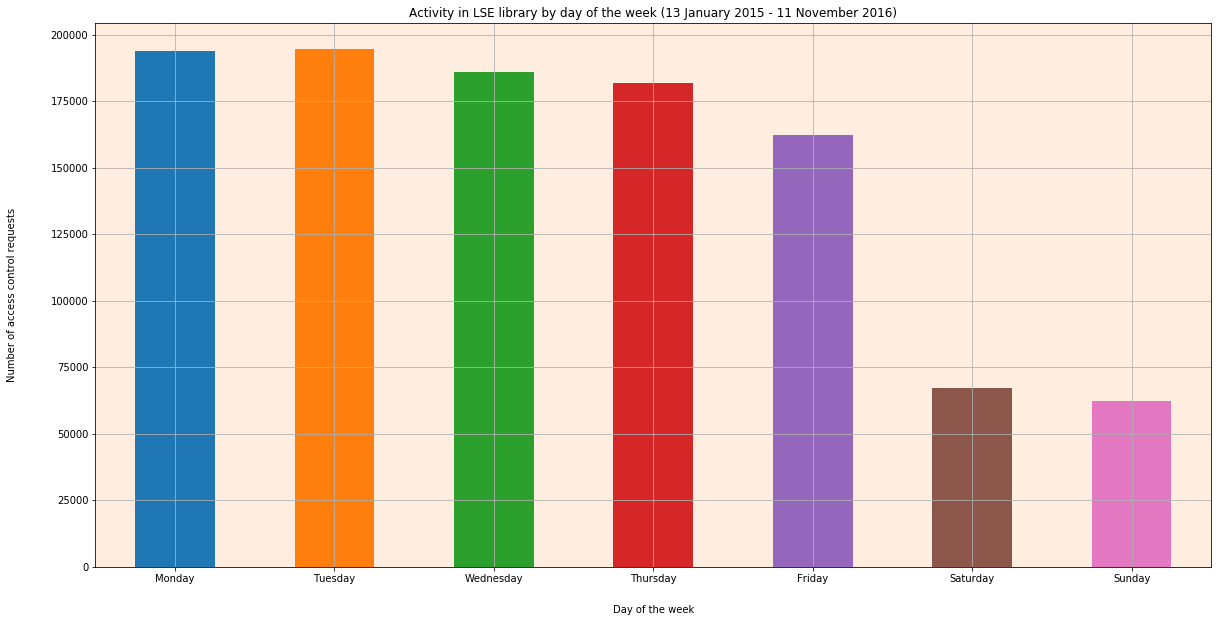

In [292]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize = (20,10))
df_time['Name of day'].value_counts().sort_index().reindex(weekday_order).plot(kind = 'bar', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axes
ax.set_xlabel('Day of the week')
ax.set_ylabel('Number of access control requests')
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.07, 0.5)
plt.xticks(rotation = 0)

# title
ax.set_title('Activity in LSE library by day of the week (13 January 2015 - 11 November 2016)')
plt.show()

We see monotonically decreasing library activity by the day of the week. What about hour-to-hour activity?

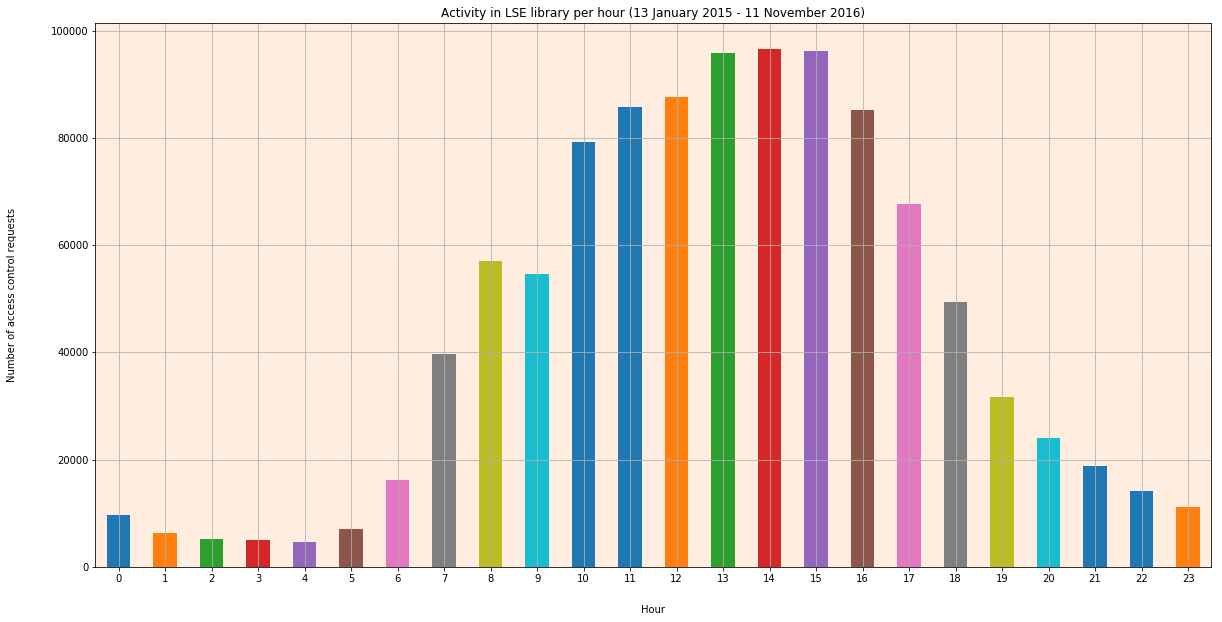

In [293]:
fig, ax = plt.subplots(figsize = (20,10))
df_time['Hour'].value_counts().sort_index().plot(kind = 'bar', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axes
ax.set_xlabel('Hour')
ax.set_ylabel('Number of access control requests')
ax.xaxis.set_label_coords(0.5,-0.07)
ax.yaxis.set_label_coords(-0.07,0.5)
plt.xticks(rotation = 0)

# title
ax.set_title('Activity in LSE library per hour (13 January 2015 - 11 November 2016)')
plt.show()

LSE library activity peak hours are between 13h-16h. Note the leftish asymmetry of morning library activity and the 8h peak. During the night cleaners are active in the library (in lent and summer term the library is open as well for students).

What about library activity by day of the month?

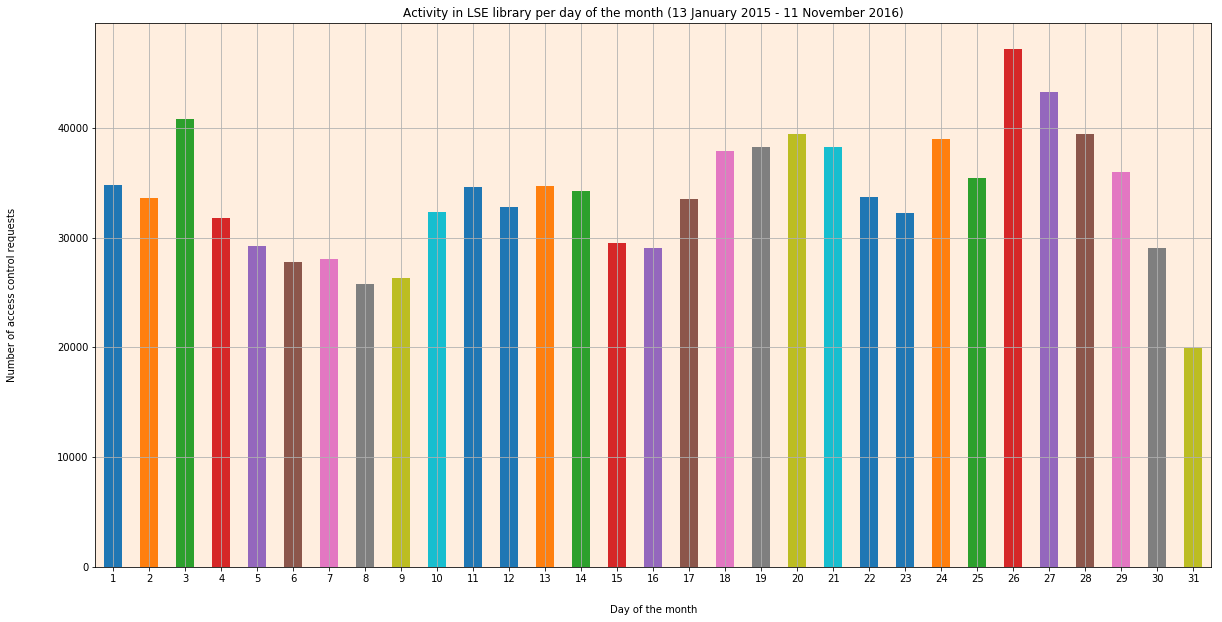

In [294]:
fig, ax = plt.subplots(figsize = (20,10))
df_time['Day'].value_counts().sort_index().plot(kind = 'bar', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axes
ax.set_xlabel('Day of the month')
ax.set_ylabel('Number of access control requests')
ax.xaxis.set_label_coords(0.5,-0.07)
ax.yaxis.set_label_coords(-0.07,0.5)
plt.xticks(rotation = 0)

# title
ax.set_title('Activity in LSE library per day of the month (13 January 2015 - 11 November 2016)')
plt.show()

Please be aware that 7/12 months have a 31st day of the month and 11/12 months do have a 29th and 30st day of the month. We compensate for this difference:

In [324]:
month_act = df_time['Day'].value_counts().sort_index().tolist()
month_act[28] = month_act[28] * 12 / 11
month_act[29] = month_act[29] * 12 / 11
month_act[30] = month_act[30] * 12 / 7

On top of that, our data starts at the 13th of a month at 23h01, ends at the 11th of the month at 15h51 and contains a leap year. However, we regard this difference as negligible. We plot the normalized bar chart:

In [334]:
col_idx = list(range(1,32))
month_series = pd.DataFrame([month_act], columns = col_idx)
month_series.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,34840,33592,40858,31800,29242,27826,28092,25812,26352,32361,...,33693,32220,39030,35446,47195,43288,39463,39265.090909,31700.727273,34236.0


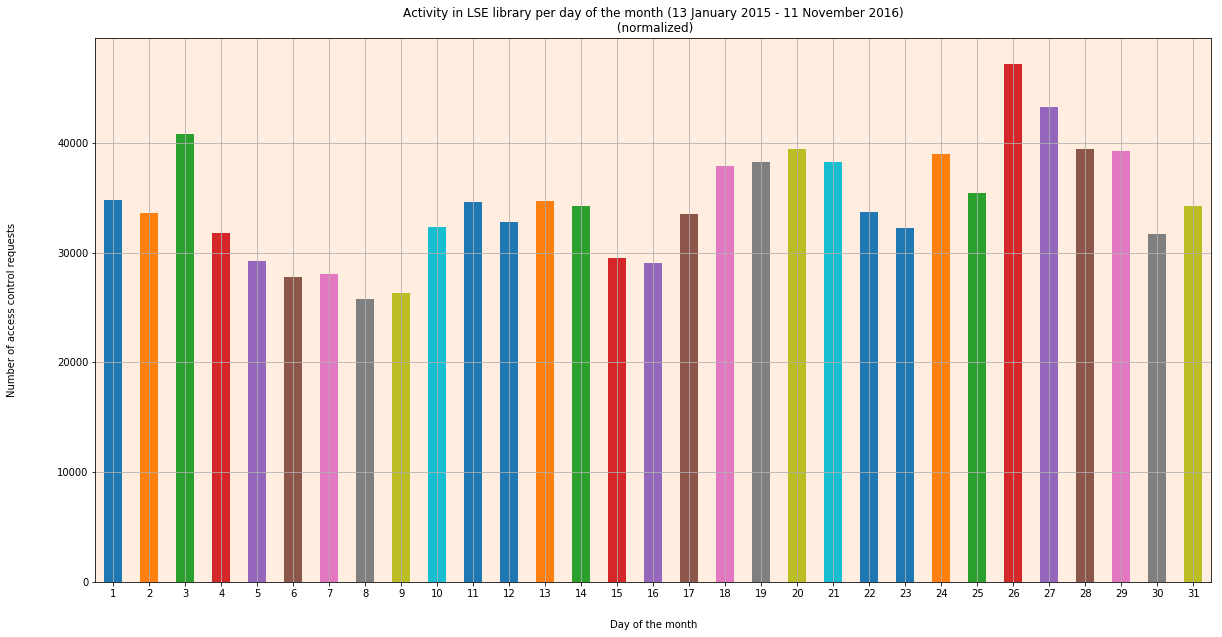

In [335]:
fig, ax = plt.subplots(figsize = (20,10))
month_series.iloc[0,].plot(kind = 'bar', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axes
ax.set_xlabel('Day of the month')
ax.set_ylabel('Number of access control requests')
ax.xaxis.set_label_coords(0.5,-0.07)
ax.yaxis.set_label_coords(-0.07,0.5)
plt.xticks(rotation = 0)

# title
ax.set_title('Activity in LSE library per day of the month (13 January 2015 - 11 November 2016)\n (normalized)')
plt.show()

Now, we can conclude that on average the most activity is on the LSE library on the 26th day of the month.

We have to be careful to plot the number of access control requests in the LSE library by month since the data start mid January 2015 and ends mid November 2016. Therefore, we first only plot the number of access control requests in the LSE library of the year 2015 by month. We first create a seperate 2015 dataframe:

In [336]:
# subset 2015
df_2015 = df_time.loc[df_time['Year'] == 2015]
df_2015.head()

,EventTime,Location,Event,IdNumber,Year,Month,Day,Hour,Name of day
2015-01-13 23:01:17,2015-01-13 23:01:17,LRB IN,Door forced,NaN,2015,1,13,23,Tuesday
2015-01-13 23:05:12,2015-01-13 23:05:12,LRB IN,Valid Access,201118813,2015,1,13,23,Tuesday
2015-01-13 23:05:18,2015-01-13 23:05:18,LRB IN,Door forced,NaN,2015,1,13,23,Tuesday
2015-01-13 23:06:03,2015-01-13 23:06:03,LRB - 4th Right Hand Side (FMG),Valid Access,201118813,2015,1,13,23,Tuesday
2015-01-13 23:10:18,2015-01-13 23:10:18,LRB IN,Door forced,NaN,2015,1,13,23,Tuesday


Note that 2015's data starts at the 13th of January and is therefore not entirely representative yet. However, it does not make sense to correct the value_counts for January with a factor 31/13 since the first half of January is part of the winter holidays. But in this sense, the month January is similar to December: the first respectively the last two weeks are winter holidays, the other part of the month is term period. Therefore, we look at the ratio of access requests in the term and holiday part of December 2015.

In [351]:
df_dec1 = df_2015[(df_2015.index > '2015-12-01 00:00') & (df_2015.index < '2015-12-18 23:59')]
df_dec1.shape

(17621, 9)

In [352]:
df_dec2 = df_2015[(df_2015.index > '2015-12-19 00:00') & (df_2015.index < '2015-12-31 23:59')]
df_dec2.shape

(3323, 9)

Roughly, this turns out to be 5:1. Hence, we correct the amount of value_counts for January 2015 with a factor 1.2.

In [353]:
act_2015 = df_2015['Month'].value_counts().sort_index().tolist()
act_2015[0] = act_2015[0] * 1.2
act_2015 

[19471.2,
 23458,
 30348,
 24852,
 20161,
 23819,
 26988,
 21541,
 16186,
 20768,
 25605,
 20944]

And plot the number of access control requests in the LSE library by month:

In [354]:
col_idx = list(range(1,13))
year_series = pd.DataFrame([act_2015], columns = col_idx)
year_series.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,19471.2,23458,30348,24852,20161,23819,26988,21541,16186,20768,25605,20944


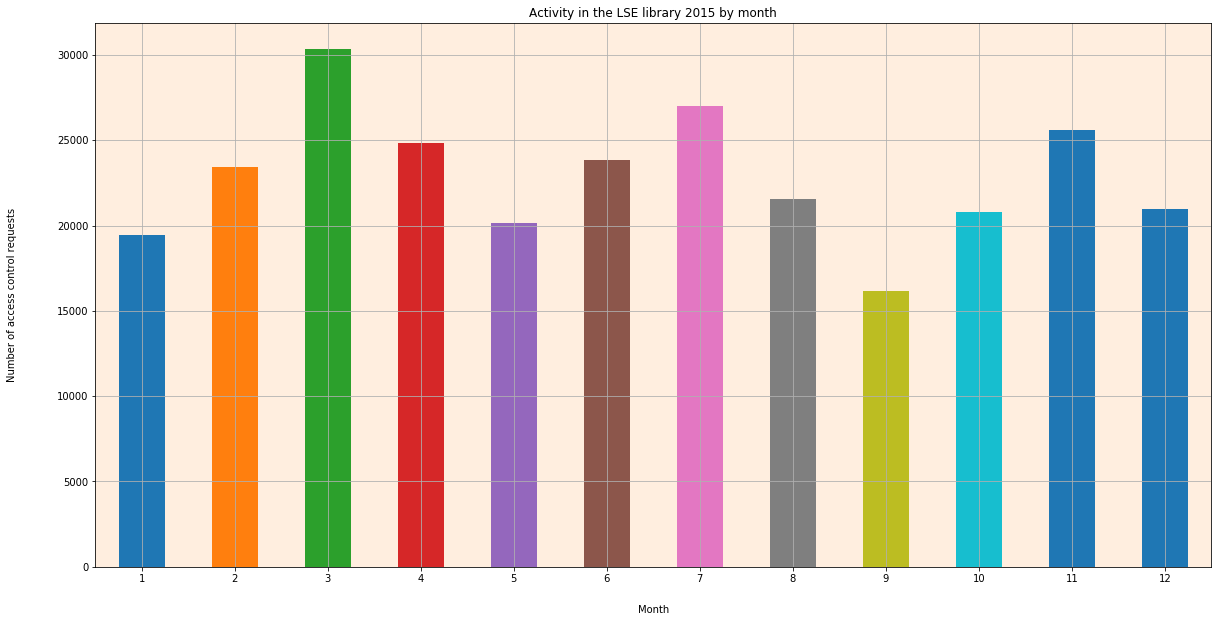

In [355]:
fig, ax = plt.subplots(figsize = (20,10))
year_series.iloc[0,].plot(kind = 'bar', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# axes
ax.set_xlabel('Month')
ax.set_ylabel('Number of access control requests')
ax.xaxis.set_label_coords(0.5,-0.07)
ax.yaxis.set_label_coords(-0.07,0.5)
plt.xticks(rotation = 0)

# title
ax.set_title('Activity in the LSE library 2015 by month')
plt.show()

In 2015, March turned out to be the month with the most library activity.

Next, we take a closer look to the 2015/16 winter holidays. We select the LSE library activity data for 1 December 2015 to 12 January 2016.

In [381]:
df_chr_hol = df_time[(df_time.index > '2015-12-01 00:00') & (df_time.index < '2016-01-12 23:59')]
df_chr_hol["Merge"] = df_chr_hol["Year"].map(str) + df_chr_hol["Month"].map(str) + df_chr_hol["Day"].map(str)
df_chr_hol.tail()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EventTime,Location,Event,IdNumber,Year,Month,Day,Hour,Name of day,Merge
2016-01-12 23:48:36,2016-01-12 23:48:36,LRB - Bridge to OLD Building,Door forced,NaN,2016,1,12,23,Tuesday,2016112
2016-01-12 23:53:36,2016-01-12 23:53:36,LRB - Bridge to OLD Building,Door forced,NaN,2016,1,12,23,Tuesday,2016112
2016-01-12 23:56:59,2016-01-12 23:56:59,"""LRB 4.01 PhD Academy """,Valid Access (Learn MR),400441,2016,1,12,23,Tuesday,2016112
2016-01-12 23:57:34,2016-01-12 23:57:34,"""LRB 4.18 Connecting """,Valid Access (Learn MR),400441,2016,1,12,23,Tuesday,2016112
2016-01-12 23:58:36,2016-01-12 23:58:36,LRB - Bridge to OLD Building,Door forced,NaN,2016,1,12,23,Tuesday,2016112


Note that in order to distinguish December 12th from January 12th, we create a unique merge of YYDDMM in the Merge column. According to those unique elements in the Merge column we create a day of the week, DD, MM, YY indexation. We plot the result:

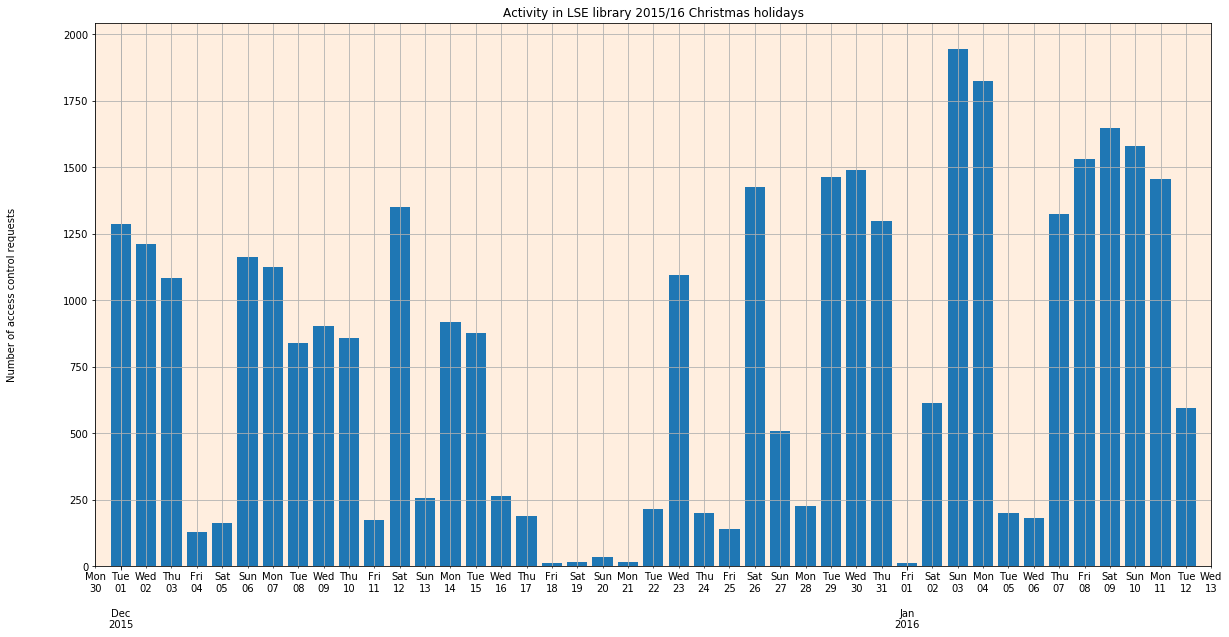

In [386]:
import matplotlib.dates as dates

# value counts list
df_chr_hol_value_counts = df_chr_hol['Merge'].value_counts().sort_index().tolist()

# pandas dataframe
idx = pd.date_range('2015-12-01', '2016-01-12')
count_series = pd.Series(df_chr_hol_value_counts, index = idx)
count_df = pd.DataFrame([count_series])

# plot
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(idx.to_pydatetime(), count_series)

# count_df.plot(kind = 'bar', ax = ax)
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday = range(1,43), interval = 1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%a\n%d'))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# grid
ax.grid(which = 'both')
ax.set_facecolor('#FFEEDF')
ax.set_xlim(pd.Timestamp('2015-11-30'), pd.Timestamp('2016-01-13')) 

# title + axis labels
ax.set_title('Activity in LSE library 2015/16 Christmas holidays')
ax.set_ylabel('Number of access control requests')
ax.yaxis.set_label_coords(-0.07, 0.5)


# plot
plt.show()

The above bar plot is rather strange: we see an inconsistent ratio between weekend and week activity, in the period 18-21 December there is almost the same amount of activity than on Christmas Day and the busiest day of the above period is a Sunday 3 January, a Sunday in the winter holiday. Therefore, we question whether the delivered data is complete. We scrutinize the data by plotting the value_counts of Location events.

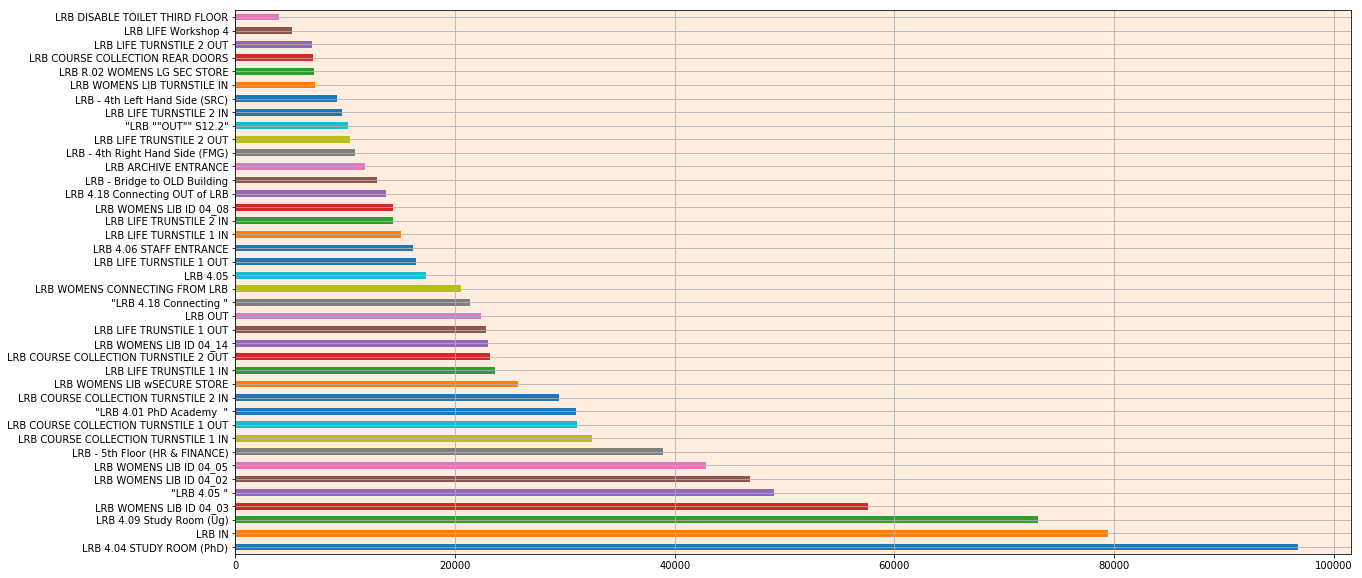

In [388]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,10))
df_time['Location'].value_counts()[0:40].plot(kind = 'barh', ax = ax)

# grid
ax.grid()
ax.set_facecolor('#FFEEDF')

# plot
plt.show()

The above plot poses a serious concern about the completeness of the delivered data: the LRB COURSE COLLECTION TURNSTILE 1 and LRB COURSE COLLECTION TURNSTILE 2 IN and OUT data almost equal each other but there are 79.407 LBR IN events but only 22.358 LBR OUT events. 

In [391]:
print("LBR IN", df_time['Location'].isin(['LRB IN']).sum())
print("LBR OUT", df_time['Location'].isin(['LRB OUT']).sum())

LBR IN 79407
LBR OUT 22358


Regrettable, we decide to stop analyzing the data any further.

To conclude, we give a short summary in three bullet points about the main insights achieved in __Part 3__ of this data analysis:
-  on working days there is more than twice as much activity in the LSE library than on weekend days
-  in 2015, March was the month with the most activity in the LSE library
-  the delivered entrance/exit turnstile data of the LSE library is incomplete.

# Final summary

__Part 1__
-  LSE's Department of Management is on average the most expensive department for graduate studies for overseas students within the LSE and the 3rd most expensive department for UK/EU students within the LSE.
-  Overseas PhD students pay 4 times more tuition fees than UK/EU PhD students at the LSE.
-  LSE's Department of Management delivers 10 of the 40 most expensive taught master's and provides the most graduate studies of the whole LSE

__Part 2__

-  41.4% of all students at the LSE in 2015/16-2017/18 were summer school students
-  25% of all US students at the LSE in 2015/16-2017/18 were enrolled in regular education, 75% of all US students were summer school students
-  Cyprus is proportional to country size the best represented country at the LSE

__Part 3__
-  on working days there is more than twice as much activity in the LSE library than on weekend days
-  in 2015, March was the month with the most activity in the LSE library
-  the delivered entrance/exit turnstile data of the LSE library is incomplete